# EDA espacios Verdes y Comunas

El objetivo principal poder medir y analizar la cantidad y tipo de espacios verdes en la ciudad de buenos aires y a su vez poder compararlos con los que recomiendan organizaciones como la OMS en terminos de M2 (metros cuadrados) de espacios verdes por habitante. Teniendo en cuenta que C.A.B.A. es una de las grandes urbes a nivel mundial.

## Primero se debe instalar geopandas y geoplot

In [1]:
!pip install git+git://github.com/geopandas/geopandas.git
!apt install proj-bin libproj-dev libgeos-dev
!pip install git+git://github.com/ResidentMario/geoplot.git

  Cloning git://github.com/geopandas/geopandas.git to c:\users\tom\appdata\local\temp\pip-req-build-xrxzobr9


  Running command git clone -q git://github.com/geopandas/geopandas.git 'C:\Users\Tom\AppData\Local\Temp\pip-req-build-xrxzobr9'
  ERROR: Error [WinError 2] El sistema no puede encontrar el archivo especificado while executing command git clone -q git://github.com/geopandas/geopandas.git 'C:\Users\Tom\AppData\Local\Temp\pip-req-build-xrxzobr9'
ERROR: Cannot find command 'git' - do you have 'git' installed and in your PATH?
"apt" no se reconoce como un comando interno o externo,
programa o archivo por lotes ejecutable.


  Cloning git://github.com/ResidentMario/geoplot.git to c:\users\tom\appdata\local\temp\pip-req-build-c844_s6k


  Running command git clone -q git://github.com/ResidentMario/geoplot.git 'C:\Users\Tom\AppData\Local\Temp\pip-req-build-c844_s6k'
  ERROR: Error [WinError 2] El sistema no puede encontrar el archivo especificado while executing command git clone -q git://github.com/ResidentMario/geoplot.git 'C:\Users\Tom\AppData\Local\Temp\pip-req-build-c844_s6k'
ERROR: Cannot find command 'git' - do you have 'git' installed and in your PATH?


In [1]:
import sys
'geopandas' in sys.modules

False

### Se importan bibliotecas

In [ ]:
import geopandas as gpd
import geoplot as gplt

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
%matplotlib inline

In [4]:
pd.set_option('display.max_rows', 1000)  
pd.set_option('display.max_columns', 1000) 

# Carga de datasets

Los datasets a utilizar se pueden encontrar en las siguentes paguinas: 

https://data.buenosaires.gob.ar/dataset/espacios-verdes

https://data.buenosaires.gob.ar/dataset/comunas

El de espacios verdes se descarga tanto con pandas para poder manipularlo como con geopandas para las visualizaciones de los mapas. El de comunas solo con geopandas

In [81]:
path_to_datasets = 'https://raw.githubusercontent.com/brianreinke95/TP_Grupo0_Ciencia_Datos/main/datasets/'
url_evt = path_to_datasets + 'espacios_verdes.csv'
evt= pd.read_csv(url_evt, error_bad_lines=False)

In [6]:
np.shape(evt)

(1736, 37)

In [96]:
evt.head(3)

,WKT,nombre,nombre_ev,clasificac,patio_de_j,apadrinada,observacio,fuente_geo,fuente_ins,ubicacion,decreto,fecha_decr,ordenanza_,fecha_orde,boletin_of,fecha_bole,barrio,comuna,fech_padri,vig_padri,alc_conven,nom_mapa,id_ev_pub,area,perimeter,DGEV_padri,mant_2017,tareas,estado,sup_total,canil,posta_aero,etiqueta,reja,horario_invierno,horario_verano,obs_reja
0,MULTIPOLYGON (((-58.4453556017045 -34.57924873...,ESCUELA SCALABRINI ORTIZ,ESCUELA Nº 13 D.E. 09 SCALABRINI ORTIZ,PLAZOLETA,NO,NaN,Redigitalización en Agosto de 2017. Unión de s...,USIG,USIG,"CONDE - MATIENZO, BENJAMIN, TTE. - FREIRE, RAM...",NaN,NaN,NaN,NaN,NaN,NaN,COLEGIALES,13.0,NaN,NaN,NaN,Esc. Scalabrini Ortiz,2,1658.266,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,MULTIPOLYGON (((-58.4448145611193 -34.57991038...,NaN,SIN NOMBRE,PLAZOLETA,NO,NaN,ESPACIOS VERDES,USIG,USIG,"CONDE - MATIENZO, BENJAMIN, TTE. - FREIRE, RAM...",NaN,NaN,NaN,NaN,NaN,NaN,COLEGIALES,13.0,NaN,NaN,NaN,NaN,5,3.984,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,MULTIPOLYGON (((-58.4448074253007 -34.57987067...,POLIDEPORTIVO COLEGIALES,POLIDEPORTIVO COLEGIALES,PARQUE,NO,NaN,Redigitalización por USIG en Agosto de 2017. U...,USIG,USIG,"CONDE - MATIENZO, BENJAMIN, TTE. - FREIRE, RAM...",NaN,NaN,NaN,NaN,NaN,NaN,COLEGIALES,13.0,NaN,NaN,NaN,Polidep. Colegiales,6,4686.060,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NO,NaN,NaN,NaN,NaN


In [97]:
evt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1736 entries, 0 to 1735
Data columns (total 37 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   WKT               1736 non-null   object 
 1   nombre            937 non-null    object 
 2   nombre_ev         1428 non-null   object 
 3   clasificac        1736 non-null   object 
 4   patio_de_j        1567 non-null   object 
 5   apadrinada        718 non-null    object 
 6   observacio        1150 non-null   object 
 7   fuente_geo        1697 non-null   object 
 8   fuente_ins        1683 non-null   object 
 9   ubicacion         1636 non-null   object 
 10  decreto           493 non-null    object 
 11  fecha_decr        531 non-null    object 
 12  ordenanza_        702 non-null    object 
 13  fecha_orde        738 non-null    object 
 14  boletin_of        768 non-null    object 
 15  fecha_bole        767 non-null    object 
 16  barrio            1730 non-null   object 


In [98]:
num_rows = evt.shape[0]

In [99]:
nulls = evt.isnull().sum()

In [100]:
# Columnas sin nulls
print(nulls[nulls == 0].index.to_list())

['WKT', 'clasificac', 'comuna', 'id_ev_pub', 'area', 'perimeter']


In [101]:
# Columnsas con nulls
print(nulls[nulls != 0].sort_values(ascending=False))

obs_reja            1731
etiqueta            1728
horario_invierno    1723
reja                1723
horario_verano      1723
alc_conven          1669
vig_padri           1668
fech_padri          1667
DGEV_padri          1654
estado              1653
tareas              1653
mant_2017           1653
posta_aero          1567
canil               1542
decreto             1243
fecha_decr          1205
ordenanza_          1034
apadrinada          1018
fecha_orde           998
sup_total            994
fecha_bole           969
boletin_of           968
nom_mapa             801
nombre               799
observacio           586
nombre_ev            308
patio_de_j           169
ubicacion            100
fuente_ins            53
fuente_geo            39
barrio                 6
dtype: int64


Podemos notar que muchas de las columnas tienen una gran cantidad de nulos y no aportan informacion relevante.

Se procede eliminando las columnas con muchos nulos

### Se depuran las columnas con nulos o irrelevantes

In [102]:
evt = evt.drop(["nombre_ev", "apadrinada", "observacio", "fuente_geo",
                "fuente_ins", "decreto", "fecha_decr", "ordenanza_", 
                "fecha_orde", "boletin_of", "fecha_bole", "fech_padri", 
                "vig_padri", "alc_conven", "nom_mapa", "DGEV_padri", 
                "mant_2017", "tareas", "estado", "sup_total", "canil", 
                "posta_aero", "etiqueta", "reja", "horario_invierno", 
                "horario_verano", "obs_reja"], axis = 1)

In [103]:
evt.head(3)

,WKT,nombre,clasificac,patio_de_j,ubicacion,barrio,comuna,id_ev_pub,area,perimeter
0,MULTIPOLYGON (((-58.4453556017045 -34.57924873...,ESCUELA SCALABRINI ORTIZ,PLAZOLETA,NO,"CONDE - MATIENZO, BENJAMIN, TTE. - FREIRE, RAM...",COLEGIALES,13.0,2,1658.266,0.0
1,MULTIPOLYGON (((-58.4448145611193 -34.57991038...,NaN,PLAZOLETA,NO,"CONDE - MATIENZO, BENJAMIN, TTE. - FREIRE, RAM...",COLEGIALES,13.0,5,3.984,0.0
2,MULTIPOLYGON (((-58.4448074253007 -34.57987067...,POLIDEPORTIVO COLEGIALES,PARQUE,NO,"CONDE - MATIENZO, BENJAMIN, TTE. - FREIRE, RAM...",COLEGIALES,13.0,6,4686.060,0.0


## Uso de geopandas

In [24]:
urlev = 'https://raw.githubusercontent.com/brianreinke95/TP_Grupo0_Ciencia_Datos/main/datasets/espacios_verdes.csv'
ev= gpd.read_csv(urlev, error_bad_lines=False)
np.shape(ev)

NameError: name 'gpd' is not defined

In [25]:
ev.head(2)

NameError: name 'ev' is not defined

In [ ]:
urlcom = 'https://raw.githubusercontent.com/brianreinke95/TP_Grupo0_Ciencia_Datos/main/datasets/comunasg.csv'
ev= gpd.read_csv(urlcom, error_bad_lines=False)
np.shape(com)

In [ ]:
com.head(3)

## Limpieza

Cambiamos los nombres de algunas columnas del dataset de comunas por las siguientes razones:
- La columna "comunas" se cambia por "comuna", para que tenga el mismo nombre que en el dataset de espacios verdes.
- La columna  "area" se cambia por "areac" ya que este es el area de la comuna y no se debe confundir con el dataset de espacios verdes ya que en ese caso "area" indica el area de los espacios verdes.

In [26]:
com = com.rename(columns = {'comunas': 'comuna', "area":"areac"}, inplace = False)
com.head(3)

NameError: name 'com' is not defined

In [ ]:
com.info()

En el caso de este datasets son pocas las features y todas utiles

In [ ]:
# Se cambia el formato de la columna comunas a string:
com["comuna"] = com["comuna"].astype("str")
com.head()

# Análisis

Muestro todas las clasificaciones que hay para espacios_verdes

In [27]:
ev["clasificac"].unique()

NameError: name 'ev' is not defined

In [15]:
evtxt= evt.groupby(["clasificac"]).area.sum()
evtxt = evtxt.sort_values(ascending=False)

In [16]:
evtxt

clasificac
PARQUE                       7015027.959
PARQUE SEMIPÚBLICO           3337706.205
PLAZA                        2502148.914
PLAZOLETA                    1824483.321
CANTERO CENTRAL              1112466.599
JARDÍN                        294967.606
BARRIO/COMPLEJO               124739.144
JARDÍN BOTÁNICO                49868.072
PATIO RECREATIVO               14525.283
PATIO                           1515.590
PATIO DE JUEGOS INCLUSIVO       1312.427
PASEO                           1059.347
Name: area, dtype: float64

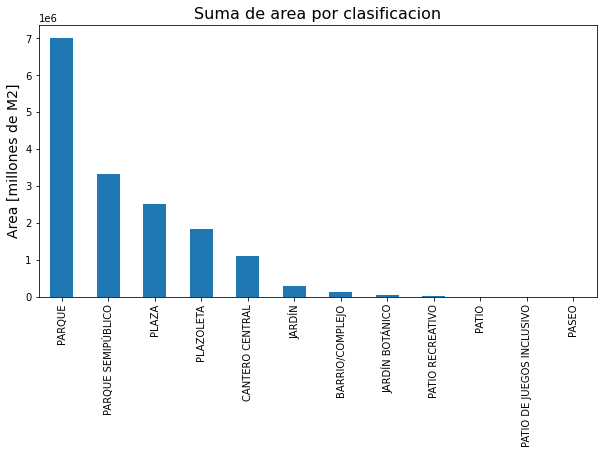

In [17]:
evtxt.plot(kind = "bar", figsize = (10,5));
plt.title("Suma de area por clasificacion", fontsize=16)
plt.ylabel("Area [millones de M2]", fontsize=14);
plt.xlabel("");

In [18]:
evtxc= evt.groupby(["comuna"]).area.sum()
evtxc = evtxc.sort_values(ascending=False)

In [19]:
evtxc

comuna
8.0     4168891.548
1.0     3242112.835
14.0    2220344.164
13.0    1746754.667
10.0    1247864.288
12.0    1014328.639
9.0      717913.744
4.0      614307.522
7.0      342438.339
2.0      336135.186
6.0      215695.441
15.0     209046.017
11.0     118195.611
3.0       45904.233
5.0       20884.801
0.0       19003.432
Name: area, dtype: float64

**Se genera un grafico de barras para conocer cuantos M2 de espacios verde tiene cada comuna**

Text(0.5, 1.0, 'Suma de area por comuna')

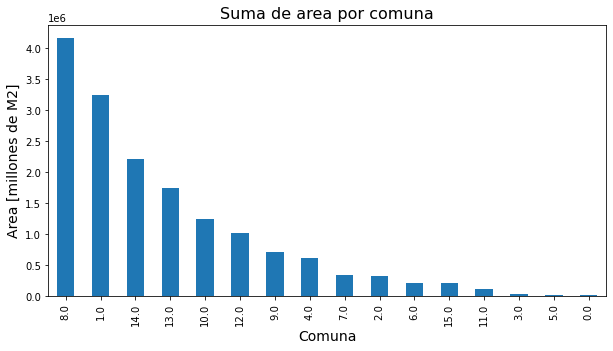

In [20]:
evtxc.plot(kind="bar", figsize = (10,5))
plt.ylabel("Area [millones de M2]", fontsize=14)
plt.xlabel("Comuna", fontsize=14)
plt.title("Suma de area por comuna", fontsize=16)

que hay en la comuna cero?

In [21]:
comuna0 = evt.loc[evt["comuna"] == 0]
comuna0

,WKT,nombre,clasificac,patio_de_j,ubicacion,barrio,comuna,id_ev_pub,area,perimeter
1497,MULTIPOLYGON (((-58.5232221247078 -34.62328958...,NaN,PLAZOLETA,NO,NOGOYA - IRIGOYEN,NaN,0.0,1643,218.798,68.768
1570,MULTIPOLYGON (((-58.4663008073522 -34.68746336...,NaN,PLAZOLETA,NO,BERGANTIN NANCY ENTRE GOLETA MALDONADO y SUMAC...,NaN,0.0,1718,567.443,143.722
1571,MULTIPOLYGON (((-58.4669406654543 -34.68696838...,NaN,PLAZOLETA,NO,BERGANTIN NANCY ENTRE GOLETA MALDONADO y SUMAC...,NaN,0.0,1717,636.672,155.392
1573,MULTIPOLYGON (((-58.4700730928219 -34.68389105...,NaN,PLAZOLETA,NO,CAFAYATE AV - BERGANTIN GENERAL BELGRANO - CAÑ...,NaN,0.0,1720,4691.384,1394.215
1574,MULTIPOLYGON (((-58.4712783786892 -34.68495759...,NaN,PLAZOLETA,NO,LISANDRO DE LA TORRE AV - FRAGATA 25 DE MAYO -...,NaN,0.0,1721,1067.996,431.405
1727,MULTIPOLYGON (((-58.3679544979871 -34.60904171...,Parque del Bajo,PARQUE,NO,MADERO EDUARDO AV - PERON JUAN DOMINGO TTE - R...,NaN,0.0,1875,11821.139,0.000


**Se modifican los valores de la comuna por los que realmente son:**

In [104]:
evt.loc[1497, 'comuna'] = 10.0
evt.loc[1570, 'comuna'] = 8.0
evt.loc[1571, 'comuna'] = 8.0
evt.loc[1573, 'comuna'] = 8.0
evt.loc[1574, 'comuna'] = 8.0
evt.loc[1727, 'comuna'] = 1.0

In [105]:
# Chequeo de que no quedan comunas 0:
comuna0 = evt["comuna"] == 0
comuna0 = evt[comuna0]
comuna0

,WKT,nombre,clasificac,patio_de_j,ubicacion,barrio,comuna,id_ev_pub,area,perimeter


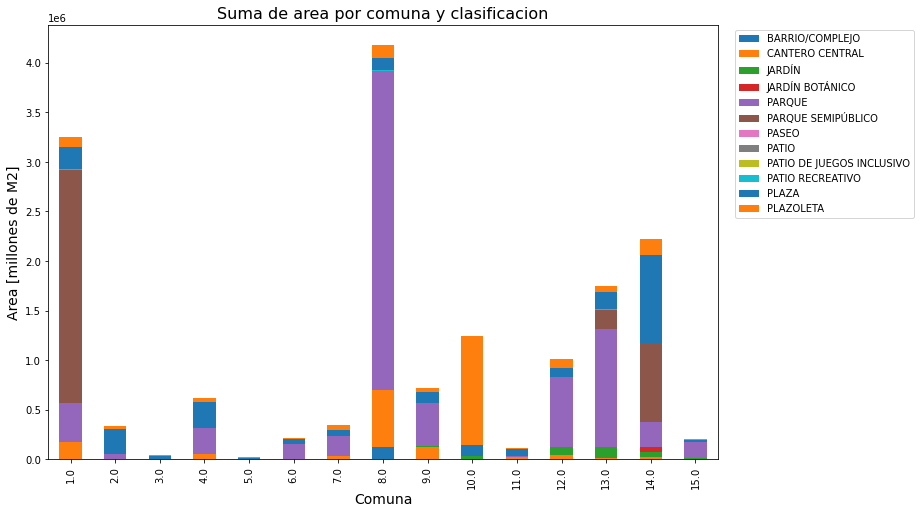

In [24]:
sub_evt = evt.groupby(["comuna", "clasificac"])["area"].sum().unstack()
sub_evt.plot(kind="bar", stacked=True, label=True, figsize = (12,8));
plt.ylabel("Area [millones de M2]", fontsize=14);
plt.xlabel("Comuna", fontsize=14);
plt.title("Suma de area por comuna y clasificacion", fontsize=16);
plt.legend(bbox_to_anchor=(1.3, 1));

Se generan Boxplot por cada clasificacion de Espacios verdes y por comuna

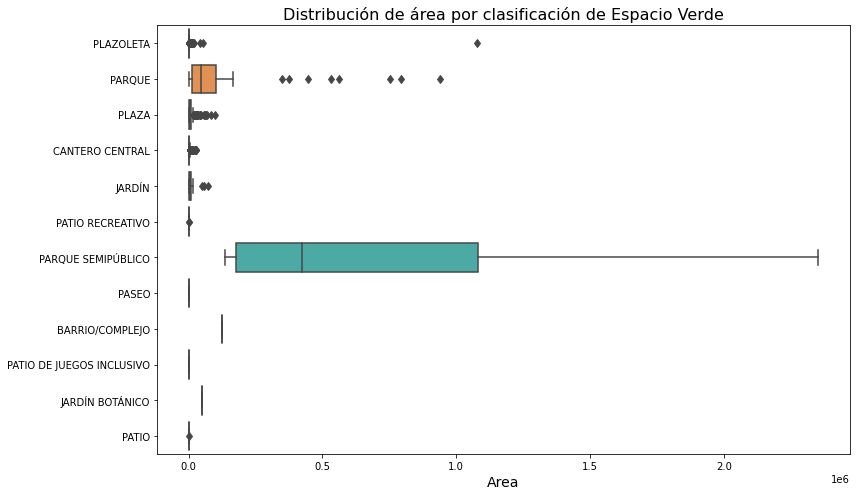

In [25]:
plt.figure(figsize=(12,7))
ax = sns.boxplot(y="clasificac", x="area", data=evt, fliersize = 6)
plt.title("Distribución de área por clasificación de Espacio Verde", fontsize=16)
plt.xlabel('Area', fontsize=14)
plt.ylabel('')
plt.tight_layout()

Se realiza el mismo grafico exceptuando el parque semipublico ya que tiene parametros muy lejanos a la media (una especie de outlier) y eso dificulta la visualizacion de las demas clasificaciones

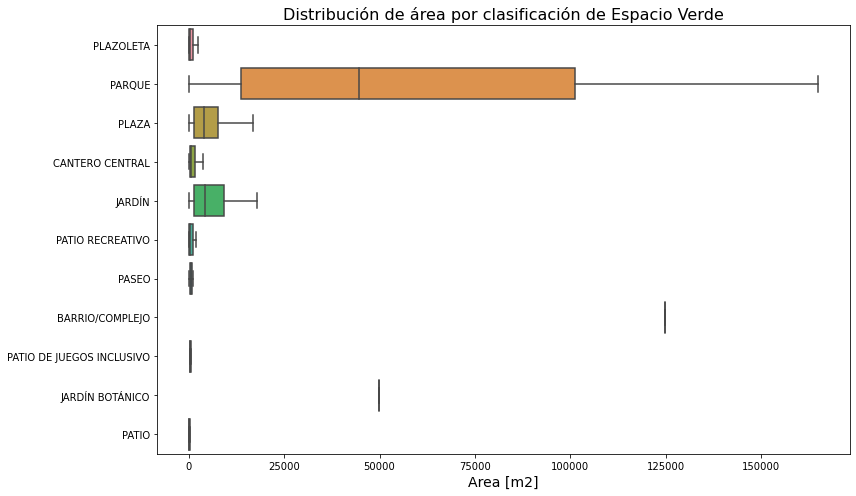

In [26]:
evtsps = evt[evt['clasificac'] != "PARQUE SEMIPÚBLICO"]

plt.figure(figsize=(12,7))
ax = sns.boxplot(y="clasificac", x="area", data=evtsps, fliersize = 6, showfliers=False)
plt.title("Distribución de área por clasificación de Espacio Verde", fontsize=16)
plt.xlabel('Area [m2]', fontsize=14)
plt.ylabel('')
plt.tight_layout()

**Se puede notar facilmente que ademas de "parque semipubluco" las clasificaciones de mayor cantidad de metros cuadrados son los parques, jardines y plazas.**

#### Tambien mostramos un Pairplot clasificado por tipo de Espacio Verde para entender mejor las relaciones de las variables

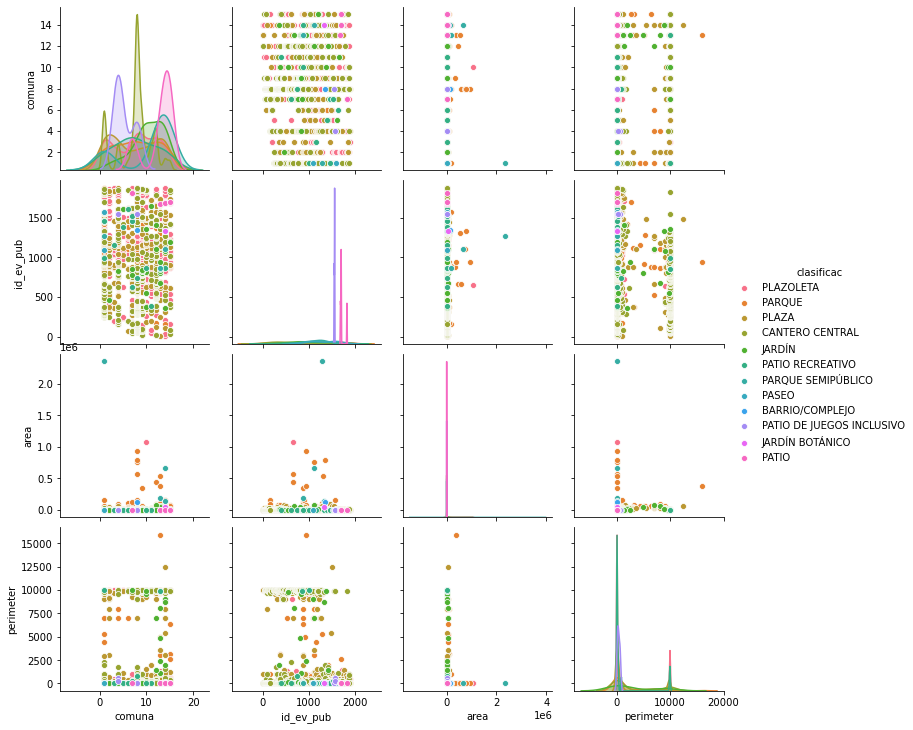

In [40]:
sns.pairplot(evt, hue = "clasificac")

plt.show()

Se hacen tablas y gráficos de torta para entender la cantidad de cada espacio y la distribucion de los m2 por clasificacion

In [27]:
evxcl = evt.clasificac.value_counts()
evxcl

PLAZOLETA                    644
CANTERO CENTRAL              643
PLAZA                        333
PARQUE                        56
JARDÍN                        27
PATIO RECREATIVO              17
PATIO                          5
PARQUE SEMIPÚBLICO             4
PATIO DE JUEGOS INCLUSIVO      3
PASEO                          2
JARDÍN BOTÁNICO                1
BARRIO/COMPLEJO                1
Name: clasificac, dtype: int64

In [28]:
evxcl.to_list()

[644, 643, 333, 56, 27, 17, 5, 4, 3, 2, 1, 1]

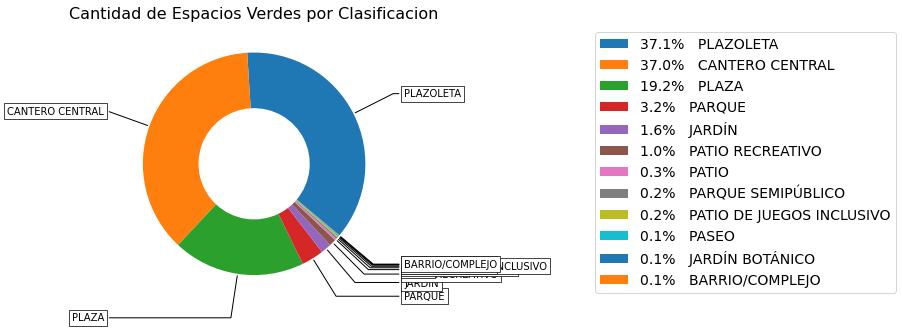

In [29]:
fig, ax = plt.subplots(figsize=(10, 6), subplot_kw=dict(aspect="equal"))

categorias = evxcl.index.to_list()

data = evxcl.to_list()

wedges, texts = ax.pie(data, wedgeprops=dict(width=0.5), startangle=-40)

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(categorias[i], xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                horizontalalignment=horizontalalignment, **kw)

ax.set_title("Cantidad de Espacios Verdes por Clasificacion", fontsize=16)

percents = [str(round((x/np.array(data).sum())*100, 1))+"%   " + y for x, y in zip(data, categorias)]
plt.legend(wedges, percents, loc='right center', bbox_to_anchor=(1.7, 1.),
           fontsize=14)
plt.tight_layout()
plt.show()

**Tambien se analiza la cantidad distribucion de los metros cuadrados por clasificacion**

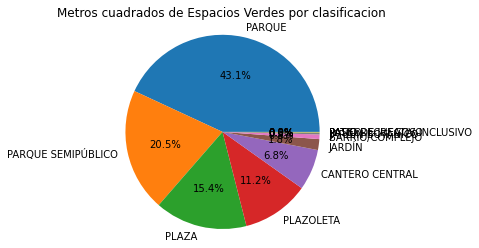

In [30]:
plt.pie(evtxt,labels = evtxt.index,autopct='%1.1f%%',)
plt.title('Metros cuadrados de Espacios Verdes por clasificacion')
plt.axis('equal')
plt.show()

Tanto la tabla como el grafico de tortas se realizan a nivel comuna

In [31]:
mevxc = evt.groupby(["comuna"]).area.sum()
mevxc

comuna
1.0     3253933.974
2.0      336135.186
3.0       45904.233
4.0      614307.522
5.0       20884.801
6.0      215695.441
7.0      342438.339
8.0     4175855.043
9.0      717913.744
10.0    1248083.086
11.0     118195.611
12.0    1014328.639
13.0    1746754.667
14.0    2220344.164
15.0     209046.017
Name: area, dtype: float64

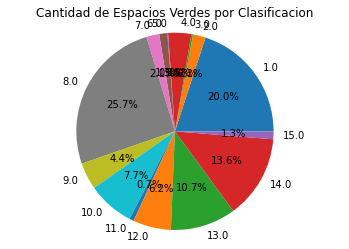

In [32]:
plt.pie(mevxc,labels = mevxc.index,autopct='%1.1f%%',)
plt.title('Cantidad de Espacios Verdes por Clasificacion')
plt.axis('equal')
plt.show()

In [33]:
ordenevt = evt[evt.clasificac == "PARQUE" ].sort_values('area',ascending=False) 
ordenevt

,WKT,nombre,clasificac,patio_de_j,ubicacion,barrio,comuna,id_ev_pub,area,perimeter
805,MULTIPOLYGON (((-58.4607358822111 -34.67093269...,Parque Indoamericano,PARQUE,SI,"LACARRA, AV. - ESCALADA, AV. - CASTAÑARES, AV....",VILLA SOLDATI,8.0,943,939020.362,0.000
1423,MULTIPOLYGON (((-58.4415609270108 -34.67758243...,Pque. Polidep. Pdte. Julio A. Roca,PARQUE,NaN,NaN,VILLA SOLDATI,8.0,1341,794299.938,0.000
971,MULTIPOLYGON (((-58.4564024960668 -34.68512295...,Parque de las Victorias,PARQUE,SI,"LARRAZABAL, AV. - FERNANDEZ DE LA CRUZ, FRANCI...",VILLA LUGANO,8.0,1110,753829.274,0.000
553,MULTIPOLYGON (((-58.4492409998454 -34.66601182...,Ciudad del Rock,PARQUE,NaN,NaN,VILLA SOLDATI,8.0,664,563451.362,0.000
1171,MULTIPOLYGON (((-58.4411748729202 -34.54610700...,Ciudad Universitaria,PARQUE,NO,"DARIO, RUBEN, AV. PROLONGACION IMAGINARIA - RI...",BELGRANO,13.0,1313,530293.743,0.000
551,MULTIPOLYGON (((-58.4970463240198 -34.56284264...,Parque Presidente Sarmiento,PARQUE,NaN,NaN,SAAVEDRA,12.0,662,446789.954,0.000
802,MULTIPOLYGON (((-58.4563481819296 -34.52698361...,Parque de los Niños,PARQUE,NaN,CIRCULO POLICIAL - CLUB CASA - PARTIDO DE VICE...,NUÑEZ,13.0,940,375443.738,15917.933
739,MULTIPOLYGON (((-58.4776103883384 -34.64870037...,Parque Avellaneda,PARQUE,SI,"DIRECTORIO, AV. - LACARRA, AV. - MONTE - AUTO...",PARQUE AVELLANEDA,9.0,874,349112.441,0.000
112,MULTIPOLYGON (((-58.4045696562691 -34.56358012...,Ing. Agr. Benito J. Carrasco,PARQUE,NO,"OBLIGADO, RAFAEL, AV. COSTANERA (MURALLON) -SA...",PALERMO,14.0,160,164879.673,0.000
758,MULTIPOLYGON (((-58.3502615614609 -34.61153721...,Balneario Sud,PARQUE,NO,"ACHAVAL RODRIGUEZ, TRISTAN, DR., AV. E/ SANCH...",PUERTO MADERO,1.0,893,157576.473,1000.000


## Geopandas

In [34]:
ev = ev.drop(["nombre_ev", "apadrinada", "observacio", "fuente_geo", "fuente_ins", "decreto", "fecha_decr", "ordenanza_", "fecha_orde", "boletin_of", "fecha_bole", "fech_padri", "vig_padri", "alc_conven", "nom_mapa", "DGEV_padri", "mant_2017", "tareas", "estado", "sup_total", "canil", "posta_aero", "etiqueta", "reja", "horario_invierno", "horario_verano", "obs_reja"], axis = 1)

NameError: name 'ev' is not defined

In [35]:
evt.loc[1497, 'comuna'] = 10.0
evt.loc[1570, 'comuna'] = 8.0
evt.loc[1571, 'comuna'] = 8.0
evt.loc[1573, 'comuna'] = 8.0
evt.loc[1574, 'comuna'] = 8.0
evt.loc[1727, 'comuna'] = 1.0

### Se continuo realizando gráficos de mapas para entender la distribucion y clasificacion de los distintos espacios verdes en la ciudad de buenos aires

Grafico de espacios verdes en la ciudad segun su clasificacion

In [ ]:
gplt.choropleth(ev, hue = ev['clasificac'], figsize = (20,16), legend = True)

Grafico de espacios verdes, con escala de colores segun su area

In [ ]:
naranja = 'OrRd'
gplt.choropleth(ev, hue = ev['area'], cmap = naranja, figsize = (20,16))

Se probaron distintas formas para graficar lo mismo

In [ ]:
ev.plot(figsize = (20,16))

In [ ]:
ev.plot(column='clasificac', legend=True, figsize= (16,12))

Se puede notar que los parques, plazoletas y plazas son los predominantes en la ciudad

tambien se separo por espacios con mayor area total para poder visualizarlo mejor, la leyenda indica area total

In [ ]:
clasif = ev.dissolve(by='clasificac', aggfunc='sum')
clasif.plot(column = 'area', scheme='quantiles', legend=True, figsize = (15,11));

Luego se grafico solo un tipo de espacios verdes para entender la distribucion de cada uno

PLAZAS

In [ ]:
ax = ev[ev.clasificac == 'PLAZA'].plot(color='white', edgecolor='black')
ax.plot(ax=ax, color='red', figsize = (18,12))
plt.show()

PLAZOLETAS

In [ ]:
ax = ev[ev.clasificac == 'PLAZOLETA'].plot(color='white', edgecolor='black')
ax.plot(ax=ax, color='red', figsize = (18,12))
plt.show()

PARQUES

In [ ]:
ax = ev[ev.clasificac == 'PARQUE'].plot(color='white', edgecolor='black')
ax.plot(ax=ax, color='red', figsize = (18,12))
plt.show()

Se puede notar una gran cantidad de plazas y plazoletas bastante distribuidas a lo largo de la ciudad, sin embargo parece los parques parecen no estar del todo distribuidos, dejando zonas lejos de alguno

### Se procedio a analizar las comunas

In [49]:
gplt.choropleth(com, hue = com['comuna'], figsize = (20,16))

NameError: name 'gplt' is not defined

## Concatenar datasets

Se unio la coluna de area de espacios verdes al dataset de comuna, recordar:
- "area" equivale a area de espacios verdes
- "areac" equivale al area total de la comuna

Se convierte el formato de la columna en string

In [36]:
mevxc = evt.groupby(["comuna"]).area.sum()
mevxc = mevxc.reset_index()
mevxc["comuna"] = mevxc["comuna"].astype("int")
mevxc["comuna"] = mevxc["comuna"].astype("str")
mevxc.head()


,comuna,area
0,1,3253933.974
1,2,336135.186
2,3,45904.233
3,4,614307.522
4,5,20884.801


Se concatenan los datos

In [51]:
evxcom = com.merge(mevxc, left_on="comuna", right_on="comuna", how='inner')
evxcom.head()

NameError: name 'com' is not defined

Se genera el gráfico degradado segun cantidad de M2 de espacios verdes por comuna

In [ ]:
gplt.choropleth(evxcom, hue = evxcom['area'], cmap = 'OrRd', figsize = (20,16), legend = True)

## Conclusion parcial

Creeamos que si bien los datasets no contiene muchas features cuantificables, con los datos de areas de espacios verdes y formas geometricas tanto de espacios como comunas se pueden analisis utiles y especificos. Ademas se tiene pensado unirlo con mas datasets de densidad poblacional en cada comuna de la ciudad y con el financiamiento que cada una recibe, para hacer un analisis aun mas global.

# Bibliografía

Se utilizaron distintas paguinas para contender el manejo de datasets de caracter geografico, sumado a las librerias basicas



https://towardsdatascience.com/plotting-geographical-data-with-geopandas-338cc7e17e4e

https://geopandas.org/aggregation_with_dissolve.html

https://geopandas.org/aggregation_with_dissolve.html
https://www.datacamp.com/community/tutorials/geospatial-data-python?utm_source=adwords_ppc&utm_campaignid=1455363063&utm_adgroupid=65083631748&utm_device=c&utm_keyword=&utm_matchtype=b&utm_network=g&utm_adpostion=&utm_creative=332602034364&utm_targetid=dsa-429603003980&utm_loc_interest_ms=&utm_loc_physical_ms=1000073&gclid=Cj0KCQjwt4X8BRCPARIsABmcnOrWMSIaHzSoPH6EUAqAK2TPpsrLjKSR6wy41-uzoi5kBgnQXT49jBgaAuOgEALw_wcB



# EDA Población

Analizaremos la poblacion en C.A.B.A.,su distribución y evolución para poder comprender mejor la problematica de espacios verdes que posee la misma. Esta información es sumamente revelante para poder responder nuestros objetivos.

## Importamos las librerias

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Importamos el dataset


El dataset lo obtuvimos de la página del Gobierno de la Ciudad.

Contiene la cantidad de habitantes en CABA desde 2015 a 2020. Como asi tambien la estimacion poblacional hasta el año 2025.

In [38]:
urlpob = 'https://raw.githubusercontent.com/brianreinke95/TP_Grupo0_Ciencia_Datos/main/datasets/Estimacion_Poblacion_nuevo.csv'
poblacion = pd.read_csv(urlpob, error_bad_lines=False)

Una vez cargado el dataset, observamos la cantidad de filas y columnas

In [39]:
np.shape(poblacion)

(396, 19)

Visualizamos los primeros renglones del dataset de población

In [40]:
poblacion.head()

,Grupo de edad (años),Total,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,SEXO,AÑO
0,Total,"1,426,582","123,030","66,915","90,417","113,113","85,451","83,865","112,134","106,508","81,816","79,581","89,555","99,162","107,341","102,439","85,255",Hombre,2015
1,0-4,"108,023","8,902","3,819","6,405","10,301","5,797","5,806","9,568","11,768","6,465","5,743","6,041","7,305","7,635","6,518","5,950",Hombre,2015
2,5-9,"105,680","7,939","3,568","6,198","10,183","5,868","5,545","9,274","11,335","6,865","6,192","6,603","7,002","6,956","5,957","6,195",Hombre,2015
3,10-14,"99,209","7,592","3,347","5,858","10,054","5,384","4,955","8,764","10,616","6,658","5,488","6,390","6,402","6,446","5,523","5,732",Hombre,2015
4,15-19,"94,542","7,654","4,005","5,626","8,996","5,262","4,770","8,086","9,369","5,845","5,426","5,779","6,079","6,237","5,819","5,589",Hombre,2015



Exploro las columnas de mi dataframe 

In [41]:
poblacion.columns

Index(['Grupo de edad (años)', 'Total', '1', '2', '3', '4', '5', '6', '7', '8',
       '9', '10', '11', '12', '13', '14', '15', 'SEXO', 'AÑO'],
      dtype='object')

## Analizamos si existen NaNs

In [42]:
col_nulls = poblacion.isnull().any()
col_nulls

Grupo de edad (años)    False
Total                   False
1                       False
2                       False
3                       False
4                       False
5                       False
6                       False
7                       False
8                       False
9                       False
10                      False
11                      False
12                      False
13                      False
14                      False
15                      False
SEXO                    False
AÑO                     False
dtype: bool

## Modificamos las nombres de las columnas 

Para poder visualizar mejor los resultados la identificacion de comuna solamente con su numero no es conviente. Debido a esto procedemos a modificar los enncabezados.
Modificamos la columna del rango de edad para que sea mas cómodo su uso.

In [43]:
poblacion.rename(columns={'Grupo de edad (años)':'Rango Etario','1':'Comuna 1','2':'Comuna 2','3':'Comuna 3','4':'Comuna 4','5':'Comuna 5','6':'Comuna 6','7':'Comuna 7','8':'Comuna 8','9':'Comuna 9','10':'Comuna 10','11':'Comuna 11','12':'Comuna 12','13':'Comuna 13','14':'Comuna 14','15':'Comuna 15',},inplace=True) 

In [44]:
poblacion.columns

Index(['Rango Etario', 'Total', 'Comuna 1', 'Comuna 2', 'Comuna 3', 'Comuna 4',
       'Comuna 5', 'Comuna 6', 'Comuna 7', 'Comuna 8', 'Comuna 9', 'Comuna 10',
       'Comuna 11', 'Comuna 12', 'Comuna 13', 'Comuna 14', 'Comuna 15', 'SEXO',
       'AÑO'],
      dtype='object')

Observamos como queda nuestro dataset con los cambios efectuados

In [45]:
poblacion.head()

,Rango Etario,Total,Comuna 1,Comuna 2,Comuna 3,Comuna 4,Comuna 5,Comuna 6,Comuna 7,Comuna 8,Comuna 9,Comuna 10,Comuna 11,Comuna 12,Comuna 13,Comuna 14,Comuna 15,SEXO,AÑO
0,Total,"1,426,582","123,030","66,915","90,417","113,113","85,451","83,865","112,134","106,508","81,816","79,581","89,555","99,162","107,341","102,439","85,255",Hombre,2015
1,0-4,"108,023","8,902","3,819","6,405","10,301","5,797","5,806","9,568","11,768","6,465","5,743","6,041","7,305","7,635","6,518","5,950",Hombre,2015
2,5-9,"105,680","7,939","3,568","6,198","10,183","5,868","5,545","9,274","11,335","6,865","6,192","6,603","7,002","6,956","5,957","6,195",Hombre,2015
3,10-14,"99,209","7,592","3,347","5,858","10,054","5,384","4,955","8,764","10,616","6,658","5,488","6,390","6,402","6,446","5,523","5,732",Hombre,2015
4,15-19,"94,542","7,654","4,005","5,626","8,996","5,262","4,770","8,086","9,369","5,845","5,426","5,779","6,079","6,237","5,819","5,589",Hombre,2015


In [46]:
poblacion.set_index('Rango Etario')

,Total,Comuna 1,Comuna 2,Comuna 3,Comuna 4,Comuna 5,Comuna 6,Comuna 7,Comuna 8,Comuna 9,Comuna 10,Comuna 11,Comuna 12,Comuna 13,Comuna 14,Comuna 15,SEXO,AÑO
Rango Etario,,,,,,,,,,,,,,,,,,
Total,"1,426,582","123,030","66,915","90,417","113,113","85,451","83,865","112,134","106,508","81,816","79,581","89,555","99,162","107,341","102,439","85,255",Hombre,2015
0-4,"108,023","8,902","3,819","6,405","10,301","5,797","5,806","9,568","11,768","6,465","5,743","6,041","7,305","7,635","6,518","5,950",Hombre,2015
5-9,"105,680","7,939","3,568","6,198","10,183","5,868","5,545","9,274","11,335","6,865","6,192","6,603","7,002","6,956","5,957","6,195",Hombre,2015
10-14,"99,209","7,592","3,347","5,858","10,054","5,384","4,955","8,764","10,616","6,658","5,488","6,390","6,402","6,446","5,523","5,732",Hombre,2015
15-19,"94,542","7,654","4,005","5,626","8,996","5,262","4,770","8,086","9,369","5,845","5,426","5,779","6,079","6,237","5,819","5,589",Hombre,2015
20-24,"101,659","10,469","6,368","7,184","8,367","5,870","5,090","7,990","8,476","5,317","5,054","5,492","5,966","6,584","7,763","5,669",Hombre,2015
25-29,"114,348","11,934","6,728","8,179","8,662","7,213","6,351","8,458","8,361","5,591","5,547","6,313","7,186","7,993","9,180","6,652",Hombre,2015
30-34,"115,593","10,983","5,435","7,938","8,377","7,531","7,122","8,353","7,532","5,853","5,862","6,763","8,490","8,933","9,079","7,342",Hombre,2015
35-39,"113,058","10,054","4,707","7,374","8,454","7,056","7,151","8,551","7,489","6,226","6,079","7,081","8,376","9,146","8,326","6,988",Hombre,2015


## Eliminamos los subtotales

El dataset contiene todos los subtotales de cada año de la poblacion en la Ciudad.
A la hora de analizar diferentes analisis y conclusiones esas filas pueden dar a discusion y obtener estos valores se puede realizar en codigo, por lo tanto optamos por eliminarlas.

In [47]:
index_pobl=poblacion[poblacion ['Rango Etario'] == 'Total'].index

In [48]:
poblacion.drop(index_pobl , inplace=True)

In [49]:
poblacion.head()

,Rango Etario,Total,Comuna 1,Comuna 2,Comuna 3,Comuna 4,Comuna 5,Comuna 6,Comuna 7,Comuna 8,Comuna 9,Comuna 10,Comuna 11,Comuna 12,Comuna 13,Comuna 14,Comuna 15,SEXO,AÑO
1,0-4,"108,023","8,902","3,819","6,405","10,301","5,797","5,806","9,568","11,768","6,465","5,743","6,041","7,305","7,635","6,518","5,950",Hombre,2015
2,5-9,"105,680","7,939","3,568","6,198","10,183","5,868","5,545","9,274","11,335","6,865","6,192","6,603","7,002","6,956","5,957","6,195",Hombre,2015
3,10-14,"99,209","7,592","3,347","5,858","10,054","5,384","4,955","8,764","10,616","6,658","5,488","6,390","6,402","6,446","5,523","5,732",Hombre,2015
4,15-19,"94,542","7,654","4,005","5,626","8,996","5,262","4,770","8,086","9,369","5,845","5,426","5,779","6,079","6,237","5,819","5,589",Hombre,2015
5,20-24,"101,659","10,469","6,368","7,184","8,367","5,870","5,090","7,990","8,476","5,317","5,054","5,492","5,966","6,584","7,763","5,669",Hombre,2015


Observamos los valores máximos para ver si tienen sentido con la informacion poblacional de la Ciudad 

In [50]:
np.max(poblacion)

Rango Etario    80 y más
Total             99,937
Comuna 1           9,988
Comuna 2           7,759
Comuna 3           8,257
Comuna 4           9,999
Comuna 5           8,108
Comuna 6           7,912
Comuna 7           9,568
Comuna 8           9,968
Comuna 9           6,903
Comuna 10          6,580
Comuna 11          7,634
Comuna 12          9,171
Comuna 13          9,994
Comuna 14          9,967
Comuna 15          7,671
SEXO               Mujer
AÑO                 2025
dtype: object

## Evolución de habitantes en la Ciudad Autónoma de Buenos Aires

Observamos como vario la población a lo largo de los años como asi tambien la estimación propia del Gobierno de la Ciudad.

In [51]:
pobl_año= poblacion.groupby("AÑO").sum()
pobl_año

,Rango Etario,Total,Comuna 1,Comuna 2,Comuna 3,Comuna 4,Comuna 5,Comuna 6,Comuna 7,Comuna 8,Comuna 9,Comuna 10,Comuna 11,Comuna 12,Comuna 13,Comuna 14,Comuna 15,SEXO
AÑO,,,,,,,,,,,,,,,,,,
2015,0-45-910-1415-1920-2425-2930-3435-3940-4445-49...,"108,023105,68099,20994,542101,659114,348115,59...","8,9027,9397,5927,65410,46911,93410,98310,0548,...","3,8193,5683,3474,0056,3686,7285,4354,7074,0413...","6,4056,1985,8585,6267,1848,1797,9387,3746,6405...","10,30110,18310,0548,9968,3678,6628,3778,4547,9...","5,7975,8685,3845,2625,8707,2137,5317,0566,2655...","5,8065,5454,9554,7705,0906,3517,1227,1516,0985...","9,5689,2748,7648,0867,9908,4588,3538,5517,5666...","11,76811,33510,6169,3698,4768,3617,5327,4896,8...","6,4656,8656,6585,8455,3175,5915,8536,2265,8744...","5,7436,1925,4885,4265,0545,5475,8626,0795,5174...","6,0416,6036,3905,7795,4926,3136,7637,0816,4805...","7,3057,0026,4026,0795,9667,1868,4908,3767,1906...","7,6356,9566,4466,2376,5847,9938,9339,1467,9216...","6,5185,9575,5235,8197,7639,1809,0798,3267,4485...","5,9506,1955,7325,5895,6696,6527,3426,9886,1785...",HombreHombreHombreHombreHombreHombreHombreHomb...
2016,0-45-910-1415-1920-2425-2930-3435-3940-4445-49...,"107,662105,089100,98493,832100,772111,917115,7...","8,9257,9417,7747,64210,44011,75111,06310,1309,...","3,7953,5383,3993,9646,2946,5675,4274,7014,1253...","6,3806,1615,9605,5827,1188,0027,9447,3836,7925...","10,27510,13610,2448,9378,3028,4878,3968,4758,1...","5,7725,8305,4755,2195,8157,0557,5357,0626,4075...","5,7805,5085,0394,7295,0406,2117,1247,1556,2345...","9,5429,2288,9268,0297,9268,2848,3708,5707,7496...","11,78011,32210,8549,3418,4408,2217,5767,5347,0...","6,4406,8236,7735,7985,2675,4705,8586,2336,0094...","5,7116,1455,5745,3744,9995,4185,8586,0765,6355...","6,0016,5456,4835,7175,4276,1606,7517,0696,6125...","7,2746,9576,5116,0295,9107,0298,4958,3837,3536...","7,5926,9016,5466,1766,5127,8068,9259,1408,0906...","6,4825,9115,6095,7637,6788,9669,0718,3217,6066...","5,9136,1435,8175,5325,6046,4907,3316,9796,3055...",HombreHombreHombreHombreHombreHombreHombreHomb...
2017,0-45-910-1415-1920-2425-2930-3435-3940-4445-49...,"107,161104,598102,49593,56299,750109,196116,11...","8,9337,9507,9357,66410,39311,53311,16610,1629,...","3,7673,5123,4393,9426,2146,3905,4314,6774,1923...","6,3476,1296,0465,5637,0437,8047,9707,3626,9215...","10,23610,09810,4068,9208,2268,2898,4348,4628,2...","5,7415,7985,5535,2005,7516,8787,5567,0396,5255...","5,7475,4765,1084,7104,9846,0547,1427,1306,3475...","9,5039,1909,0658,0137,8508,0888,4058,5547,9026...","11,77611,31811,0659,3558,3918,0577,6367,5497,2...","6,4056,7876,8705,7785,2115,3345,8756,2136,1214...","5,6726,1035,6465,3474,9385,2755,8666,0485,7315...","5,9546,4966,5605,6835,3565,9926,7547,0306,7175...","7,2346,9196,6036,0075,8456,8538,5198,3557,4886...","7,5396,8546,6306,1456,4327,6018,9379,0988,2276...","6,4385,8715,6815,7357,5858,7319,0848,2837,7366...","5,8696,0975,8885,5005,5316,3177,3376,9426,4085...",HombreHombreHombreHombreHombreHombreHombreHomb...
2018,0-45-910-1415-1920-2425-2930-3435-3940-4445-49...,"106,543104,260103,04294,34298,589106,619116,25...","8,9307,9678,0217,77010,32811,32211,24210,1709,...","3,7353,4913,4473,9646,1256,2235,4244,6434,2423...","6,3086,1076,0765,6086,9597,6187,9787,3257,0195...","10,18410,07510,4729,0038,1388,1028,4548,4318,4...","5,7035,7755,5785,2395,6806,7117,5607,0016,6155...","5,7075,4535,1314,7454,9215,9057,1457,0906,4345...","9,4539,1669,1198,0847,7647,9038,4228,5198,0236...","11,75711,33011,1719,4738,3297,9017,6807,5467,3...","6,3646,7616,9035,8245,1475,2065,8806,1816,2075...","5,6276,0705,6635,3804,8705,1415,8626,0075,8035...","5,9026,4546,5745,7145,2775,8346,7436,9766,7956...","7,1866,8916,6336,0525,7736,6868,5248,3107,5926...","7,4806,8186,6516,1836,3447,4068,9319,0368,3307...","6,3885,8415,7005,7717,4828,5099,0798,2287,8346...","5,8196,0615,9035,5325,4526,1527,3276,8916,4845...",HombreHombreHombreHombreHombreHombreHombreHomb...
2019,0-45-910-1415-1920-2425-2930-3435-3940-4445-49...,"105,8241

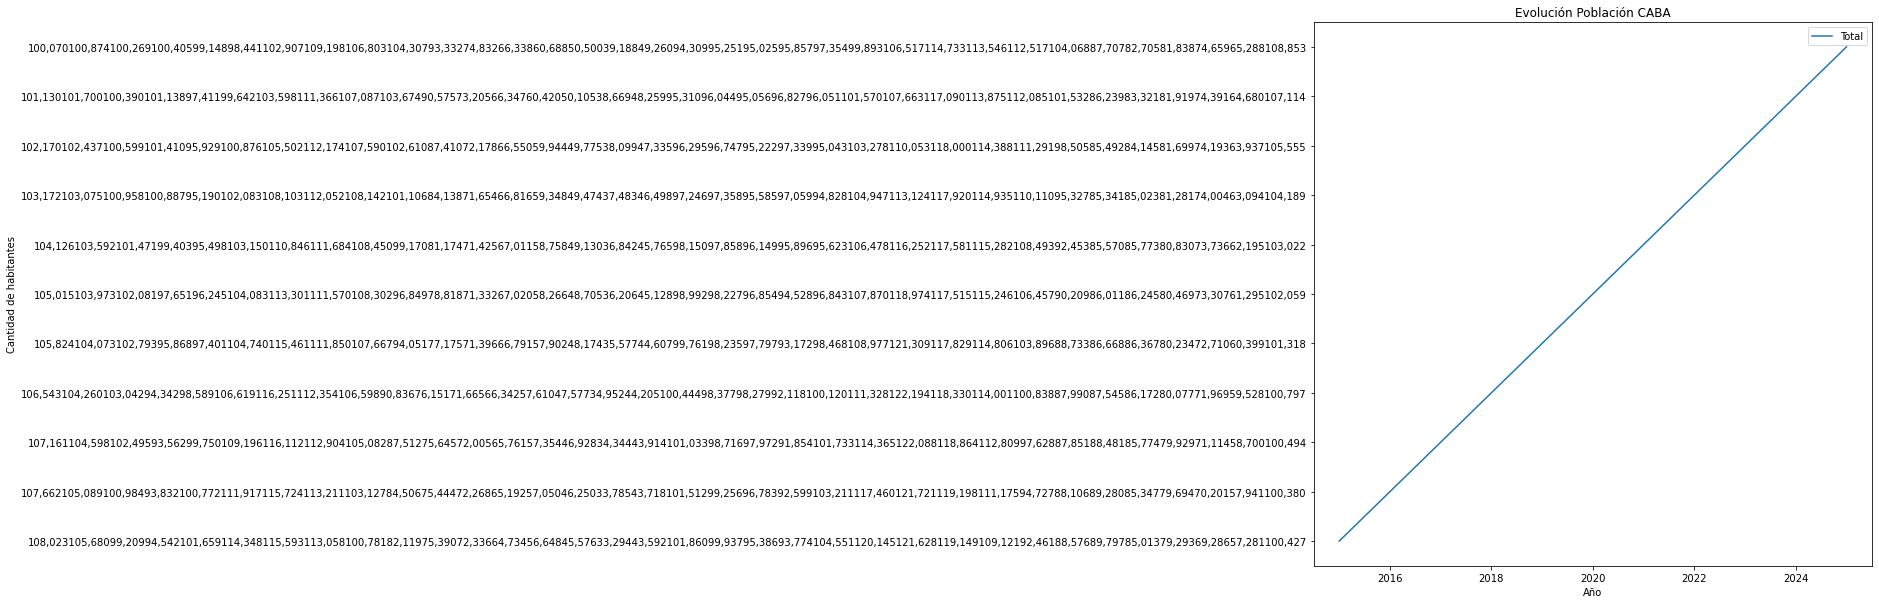

In [52]:
plt.figure(figsize=(10,10))
plt.plot(pobl_año.index, pobl_año['Total'], label='Total');

plt.legend(loc='upper right')
plt.title('Evolución Población CABA')
plt.ylabel('Cantidad de habitantes')
plt.xlabel('Año')
plt.show()

## Filtro mi dataset con la información del año 2020

La informacion del año 2020 será de gran utilidad para analizar la situación actual de la Ciudad.

In [53]:
pobl_2020 = poblacion.loc[poblacion.AÑO == 2020]

In [54]:
pobl_2020.head(10)

,Rango Etario,Total,Comuna 1,Comuna 2,Comuna 3,Comuna 4,Comuna 5,Comuna 6,Comuna 7,Comuna 8,Comuna 9,Comuna 10,Comuna 11,Comuna 12,Comuna 13,Comuna 14,Comuna 15,SEXO,AÑO
181,0-4,"105,015","8,886","3,660","6,213","10,058","5,612","5,614","9,325","11,680","6,266","5,523","5,784","7,073","7,343","6,271","5,707",Hombre,2020
182,5-9,"103,973","8,022","3,462","6,087","10,066","5,751","5,428","9,150","11,389","6,736","6,028","6,400","6,863","6,773","5,803","6,015",Hombre,2020
183,10-14,"102,081","8,023","3,396","6,016","10,394","5,518","5,073","9,043","11,153","6,831","5,587","6,476","6,562","6,564","5,625","5,820",Hombre,2020
184,15-19,"97,651","8,121","4,079","5,802","9,338","5,415","4,902","8,377","9,885","6,022","5,546","5,881","6,257","6,376","5,952","5,698",Hombre,2020
185,20-24,"96,245","10,182","5,946","6,790","7,960","5,537","4,795","7,587","8,197","5,020","4,735","5,123","5,628","6,170","7,277","5,298",Hombre,2020
186,25-29,"104,083","11,163","6,041","7,434","7,926","6,544","5,755","7,724","7,777","5,078","4,998","5,664","6,520","7,204","8,277","5,978",Hombre,2020
187,30-34,"113,301","11,068","5,259","7,774","8,258","7,361","6,953","8,220","7,548","5,728","5,691","6,537","8,300","8,675","8,819","7,110",Hombre,2020
188,35-39,"111,570","10,202","4,586","7,272","8,392","6,945","7,030","8,472","7,557","6,135","5,943","6,891","8,245","8,943","8,144","6,813",Hombre,2020
189,40-44,"108,302","9,710","4,287","7,130","8,564","6,714","6,527","8,163","7,530","6,303","5,874","6,868","7,706","8,435","7,932","6,559",Hombre,2020
190,45-49,"96,849","8,594","4,087","6,182","7,103","5,936","6,002","7,323","6,189","5,466","5,689","6,498","7,148","7,586","6,931","6,115",Hombre,2020


In [55]:
pobl_2020.set_index('Rango Etario')

,Total,Comuna 1,Comuna 2,Comuna 3,Comuna 4,Comuna 5,Comuna 6,Comuna 7,Comuna 8,Comuna 9,Comuna 10,Comuna 11,Comuna 12,Comuna 13,Comuna 14,Comuna 15,SEXO,AÑO
Rango Etario,,,,,,,,,,,,,,,,,,
0-4,"105,015","8,886","3,660","6,213","10,058","5,612","5,614","9,325","11,680","6,266","5,523","5,784","7,073","7,343","6,271","5,707",Hombre,2020
5-9,"103,973","8,022","3,462","6,087","10,066","5,751","5,428","9,150","11,389","6,736","6,028","6,400","6,863","6,773","5,803","6,015",Hombre,2020
10-14,"102,081","8,023","3,396","6,016","10,394","5,518","5,073","9,043","11,153","6,831","5,587","6,476","6,562","6,564","5,625","5,820",Hombre,2020
15-19,"97,651","8,121","4,079","5,802","9,338","5,415","4,902","8,377","9,885","6,022","5,546","5,881","6,257","6,376","5,952","5,698",Hombre,2020
20-24,"96,245","10,182","5,946","6,790","7,960","5,537","4,795","7,587","8,197","5,020","4,735","5,123","5,628","6,170","7,277","5,298",Hombre,2020
25-29,"104,083","11,163","6,041","7,434","7,926","6,544","5,755","7,724","7,777","5,078","4,998","5,664","6,520","7,204","8,277","5,978",Hombre,2020
30-34,"113,301","11,068","5,259","7,774","8,258","7,361","6,953","8,220","7,548","5,728","5,691","6,537","8,300","8,675","8,819","7,110",Hombre,2020
35-39,"111,570","10,202","4,586","7,272","8,392","6,945","7,030","8,472","7,557","6,135","5,943","6,891","8,245","8,943","8,144","6,813",Hombre,2020
40-44,"108,302","9,710","4,287","7,130","8,564","6,714","6,527","8,163","7,530","6,303","5,874","6,868","7,706","8,435","7,932","6,559",Hombre,2020


Observamos la cantidad total de habitantes en la Ciudad

In [56]:
pobl_2020['Total'].sum()

'105,015103,973102,08197,65196,245104,083113,301111,570108,30296,84978,81871,33267,02058,26648,70536,20645,12898,99298,22796,85494,52896,843107,870118,974117,515115,246106,45790,20986,01186,24580,46973,30761,295102,059'

Separamos la informacion por sexo y graficamos a la proporcion de hombres y mujeres 

In [57]:
pobl_2020_sexo= pobl_2020.groupby("SEXO").sum()
pobl_2020_sexo

,AÑO
SEXO,
Hombre,34340
Mujer,34340


In [58]:
pobl_2020_sexo.drop(columns=['AÑO'])

""
SEXO
Hombre
Mujer


In [60]:
pobl_2020_sexo.plot(kind = "bar",y="Total", figsize = (15,8), title ="Población CABA 2020-Sexo")


KeyError: 'Total'

Transponemos la data del 2020 para obtener una visualización de la cantidad de habitantes por comuna en la Ciudad.

In [61]:
pobl_2020_tr = pobl_2020.transpose()
tr_com=pobl_2020_tr.head(17)
tr_com

,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215
Rango Etario,0-4,5-9,10-14,15-19,20-24,25-29,30-34,35-39,40-44,45-49,50-54,55-59,60-64,65-69,70-74,75-79,80 y más,0-4,5-9,10-14,15-19,20-24,25-29,30-34,35-39,40-44,45-49,50-54,55-59,60-64,65-69,70-74,75-79,80 y más
Total,"105,015","103,973","102,081","97,651","96,245","104,083","113,301","111,570","108,302","96,849","78,818","71,332","67,020","58,266","48,705","36,206","45,128","98,992","98,227","96,854","94,528","96,843","107,870","118,974","117,515","115,246","106,457","90,209","86,011","86,245","80,469","73,307","61,295","102,059"
Comuna 1,"8,886","8,022","8,023","8,121","10,182","11,163","11,068","10,202","9,710","8,594","7,140","6,203","5,662","4,820","3,772","2,624","3,459","7,975","7,389","7,362","7,493","9,273","10,474","9,864","9,515","9,156","8,310","6,922","6,516","6,379","5,851","5,079","4,172","7,024"
Comuna 2,"3,660","3,462","3,396","4,079","5,946","6,041","5,259","4,586","4,287","4,087","3,506","3,521","3,708","3,482","2,829","2,059","2,799","3,278","3,215","3,176","4,470","7,131","6,946","5,924","5,028","5,014","4,940","4,512","4,722","5,044","4,826","4,419","3,400","6,678"
Comuna 3,"6,213","6,087","6,016","5,802","6,790","7,434","7,774","7,272","7,130","6,182","4,798","4,537","3,977","3,437","2,893","2,162","2,806","5,588","5,490","5,505","5,562","6,808","7,404","7,568","7,503","7,228","6,753","5,602","5,433","5,476","5,125","4,626","3,910","6,385"
Comuna 4,"10,058","10,066","10,394","9,338","7,960","7,926","8,258","8,392","8,564","7,103","5,664","5,136","4,373","3,692","3,200","2,349","2,484","9,403","9,690","9,870","9,106","7,726","7,979","8,900","8,739","8,796","7,878","6,453","5,825","5,493","5,153","4,609","3,779","5,744"
Comuna 5,"5,612","5,751","5,518","5,415","5,537","6,544","7,361","6,945","6,714","5,936","4,916","4,371","4,094","3,520","2,973","2,255","2,850","5,271","5,253","5,252","5,176","5,558","6,932","7,891","7,681","7,243","6,681","5,814","5,683","5,676","5,330","4,793","3,929","7,043"
Comuna 6,"5,614","5,428","5,073","4,902","4,795","5,755","6,953","7,030","6,527","6,002","5,100","4,703","4,440","3,812","3,107","2,428","3,121","5,410","5,288","4,868","4,788","4,949","6,274","7,696","7,713","7,263","6,791","6,086","5,774","5,887","5,381","5,012","4,060","7,426"
Comuna 7,"9,325","9,150","9,043","8,377","7,587","7,724","8,220","8,472","8,163","7,323","5,985","5,396","5,014","4,324","3,668","2,757","3,395","8,640","8,771","8,691","8,009","7,575","7,875","8,799","8,686","8,901","8,194","7,063","6,460","6,337","5,830","5,409","4,673","8,025"
Comuna 8,"11,680","11,389","11,153","9,885","8,197","7,777","7,548","7,557","7,530","6,189","4,623","3,843","3,318","2,905","2,531","1,837","1,691","11,387","11,126","10,931","9,968","8,376","7,715","7,956","8,051","7,987","6,865","5,094","4,542","4,503","4,122","3,806","3,027","3,844"


In [62]:
tr_com1=tr_com.drop(['Rango Etario','Total'])
tr_com1

,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215
Comuna 1,"8,886","8,022","8,023","8,121","10,182","11,163","11,068","10,202","9,710","8,594","7,140","6,203","5,662","4,820","3,772","2,624","3,459","7,975","7,389","7,362","7,493","9,273","10,474","9,864","9,515","9,156","8,310","6,922","6,516","6,379","5,851","5,079","4,172","7,024"
Comuna 2,"3,660","3,462","3,396","4,079","5,946","6,041","5,259","4,586","4,287","4,087","3,506","3,521","3,708","3,482","2,829","2,059","2,799","3,278","3,215","3,176","4,470","7,131","6,946","5,924","5,028","5,014","4,940","4,512","4,722","5,044","4,826","4,419","3,400","6,678"
Comuna 3,"6,213","6,087","6,016","5,802","6,790","7,434","7,774","7,272","7,130","6,182","4,798","4,537","3,977","3,437","2,893","2,162","2,806","5,588","5,490","5,505","5,562","6,808","7,404","7,568","7,503","7,228","6,753","5,602","5,433","5,476","5,125","4,626","3,910","6,385"
Comuna 4,"10,058","10,066","10,394","9,338","7,960","7,926","8,258","8,392","8,564","7,103","5,664","5,136","4,373","3,692","3,200","2,349","2,484","9,403","9,690","9,870","9,106","7,726","7,979","8,900","8,739","8,796","7,878","6,453","5,825","5,493","5,153","4,609","3,779","5,744"
Comuna 5,"5,612","5,751","5,518","5,415","5,537","6,544","7,361","6,945","6,714","5,936","4,916","4,371","4,094","3,520","2,973","2,255","2,850","5,271","5,253","5,252","5,176","5,558","6,932","7,891","7,681","7,243","6,681","5,814","5,683","5,676","5,330","4,793","3,929","7,043"
Comuna 6,"5,614","5,428","5,073","4,902","4,795","5,755","6,953","7,030","6,527","6,002","5,100","4,703","4,440","3,812","3,107","2,428","3,121","5,410","5,288","4,868","4,788","4,949","6,274","7,696","7,713","7,263","6,791","6,086","5,774","5,887","5,381","5,012","4,060","7,426"
Comuna 7,"9,325","9,150","9,043","8,377","7,587","7,724","8,220","8,472","8,163","7,323","5,985","5,396","5,014","4,324","3,668","2,757","3,395","8,640","8,771","8,691","8,009","7,575","7,875","8,799","8,686","8,901","8,194","7,063","6,460","6,337","5,830","5,409","4,673","8,025"
Comuna 8,"11,680","11,389","11,153","9,885","8,197","7,777","7,548","7,557","7,530","6,189","4,623","3,843","3,318","2,905","2,531","1,837","1,691","11,387","11,126","10,931","9,968","8,376","7,715","7,956","8,051","7,987","6,865","5,094","4,542","4,503","4,122","3,806","3,027","3,844"
Comuna 9,"6,266","6,736","6,831","6,022","5,020","5,078","5,728","6,135","6,303","5,466","4,520","4,094","3,875","3,294","2,831","2,162","2,495","5,867","6,156","6,076","5,700","4,676","4,957","5,645","6,118","6,284","5,804","4,744","4,515","4,446","4,356","4,062","3,595","5,407"
Comuna 10,"5,523","6,028","5,587","5,546","4,735","4,998","5,691","5,943","5,874","5,689","4,819","4,306","4,098","3,324","2,965","2,237","2,702","5,311","5,563","5,729","5,195","4,712","5,038","5,941","6,259","6,427","6,242","5,371","5,085","4,839","4,525","4,345","3,781","6,164"


In [63]:
tr_com1["sum"] = tr_com1.sum(axis=1)
tr_com1

,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,sum
Comuna 1,"8,886","8,022","8,023","8,121","10,182","11,163","11,068","10,202","9,710","8,594","7,140","6,203","5,662","4,820","3,772","2,624","3,459","7,975","7,389","7,362","7,493","9,273","10,474","9,864","9,515","9,156","8,310","6,922","6,516","6,379","5,851","5,079","4,172","7,024","8,8868,0228,0238,12110,18211,16311,06810,2029,..."
Comuna 2,"3,660","3,462","3,396","4,079","5,946","6,041","5,259","4,586","4,287","4,087","3,506","3,521","3,708","3,482","2,829","2,059","2,799","3,278","3,215","3,176","4,470","7,131","6,946","5,924","5,028","5,014","4,940","4,512","4,722","5,044","4,826","4,419","3,400","6,678","3,6603,4623,3964,0795,9466,0415,2594,5864,2874..."
Comuna 3,"6,213","6,087","6,016","5,802","6,790","7,434","7,774","7,272","7,130","6,182","4,798","4,537","3,977","3,437","2,893","2,162","2,806","5,588","5,490","5,505","5,562","6,808","7,404","7,568","7,503","7,228","6,753","5,602","5,433","5,476","5,125","4,626","3,910","6,385","6,2136,0876,0165,8026,7907,4347,7747,2727,1306..."
Comuna 4,"10,058","10,066","10,394","9,338","7,960","7,926","8,258","8,392","8,564","7,103","5,664","5,136","4,373","3,692","3,200","2,349","2,484","9,403","9,690","9,870","9,106","7,726","7,979","8,900","8,739","8,796","7,878","6,453","5,825","5,493","5,153","4,609","3,779","5,744","10,05810,06610,3949,3387,9607,9268,2588,3928,5..."
Comuna 5,"5,612","5,751","5,518","5,415","5,537","6,544","7,361","6,945","6,714","5,936","4,916","4,371","4,094","3,520","2,973","2,255","2,850","5,271","5,253","5,252","5,176","5,558","6,932","7,891","7,681","7,243","6,681","5,814","5,683","5,676","5,330","4,793","3,929","7,043","5,6125,7515,5185,4155,5376,5447,3616,9456,7145..."
Comuna 6,"5,614","5,428","5,073","4,902","4,795","5,755","6,953","7,030","6,527","6,002","5,100","4,703","4,440","3,812","3,107","2,428","3,121","5,410","5,288","4,868","4,788","4,949","6,274","7,696","7,713","7,263","6,791","6,086","5,774","5,887","5,381","5,012","4,060","7,426","5,6145,4285,0734,9024,7955,7556,9537,0306,5276..."
Comuna 7,"9,325","9,150","9,043","8,377","7,587","7,724","8,220","8,472","8,163","7,323","5,985","5,396","5,014","4,324","3,668","2,757","3,395","8,640","8,771","8,691","8,009","7,575","7,875","8,799","8,686","8,901","8,194","7,063","6,460","6,337","5,830","5,409","4,673","8,025","9,3259,1509,0438,3777,5877,7248,2208,4728,1637..."
Comuna 8,"11,680","11,389","11,153","9,885","8,197","7,777","7,548","7,557","7,530","6,189","4,623","3,843","3,318","2,905","2,531","1,837","1,691","11,387","11,126","10,931","9,968","8,376","7,715","7,956","8,051","7,987","6,865","5,094","4,542","4,503","4,122","3,806","3,027","3,844","11,68011,38911,1539,8858,1977,7777,5487,5577,5..."
Comuna 9,"6,266","6,736","6,831","6,022","5,020","5,078","5,728","6,135","6,303","5,466","4,520","4,094","3,875","3,294","2,831","2,162","2,495","5,867","6,156","6,076","5,700","4,676","4,957","5,645","6,118","6,284","5,804","4,744","4,515","4,446","4,356","4,062","3,595","5,407","6,2666,7366,8316,0225,0205,0785,7286,1356,3035..."
Comuna 10,"5,523","6,028","5,587","5,546","4,735","4,998","5,691","5,943","5,874","5,689","4,819","4,306","4,098","3,324","2,965","2,237","2,702","5,311","5,563","5,729","5,195","4,712","5,038","5,941","6,259","6,427","6,242","5,371","5,085","4,839","4,525","4,345","3,781","6,164","5,5236,0285,5875,5464,7354,9985,6915,9435,8745..."


In [64]:
tr_com1.plot(kind='bar', y=['sum'], subplots=True, figsize=(12,9),color='r')
plt.show()

TypeError: no numeric data to plot

Luego observamos la distribucion de la población de la Ciudad según su rango de edad y comuna

In [65]:
pobl_2020_edad= pobl_2020.groupby("Rango Etario").sum()
pobl_2020_edad

,AÑO
Rango Etario,
0-4,4040
10-14,4040
15-19,4040
20-24,4040
25-29,4040
30-34,4040
35-39,4040
40-44,4040
45-49,4040


In [66]:
pobl_2020_edad.index

Index(['0-4', '10-14', '15-19', '20-24', '25-29', '30-34', '35-39', '40-44',
       '45-49', '5-9', '50-54', '55-59', '60-64', '65-69', '70-74', '75-79',
       '80 y más'],
      dtype='object', name='Rango Etario')

Cambiamos el orden de mis index para poder visualizar en orden los rangos etarios

In [67]:
pobl_2020_edad=pobl_2020_edad.reindex(index  =['0-4','5-9','10-14', '15-19', '20-24', '25-29', '30-34', '35-39', '40-44',
       '45-49','50-54', '55-59', '60-64', '65-69', '70-74', '75-79',
       '80 y más'])
pobl_2020_edad

,AÑO
Rango Etario,
0-4,4040
5-9,4040
10-14,4040
15-19,4040
20-24,4040
25-29,4040
30-34,4040
35-39,4040
40-44,4040


In [68]:
pobl_2020_edad.plot(kind = "bar",y="Total", figsize = (15,8), title ="Población CABA 2020-Rango Etario")

KeyError: 'Total'

In [69]:
plt.figure(figsize=(15,12))
plt.plot(pobl_2020_edad.index, pobl_2020_edad['Comuna 1'], label='Comuna 1');
plt.plot(pobl_2020_edad.index, pobl_2020_edad['Comuna 2'], label='Comuna 2');
plt.plot(pobl_2020_edad.index, pobl_2020_edad['Comuna 3'], label='Comuna 3');
plt.plot(pobl_2020_edad.index, pobl_2020_edad['Comuna 4'], label='Comuna 4');
plt.plot(pobl_2020_edad.index, pobl_2020_edad['Comuna 5'], label='Comuna 5');
plt.plot(pobl_2020_edad.index, pobl_2020_edad['Comuna 6'], label='Comuna 6');
plt.plot(pobl_2020_edad.index, pobl_2020_edad['Comuna 7'], label='Comuna 7');
plt.plot(pobl_2020_edad.index, pobl_2020_edad['Comuna 8'], label='Comuna 8');
plt.plot(pobl_2020_edad.index, pobl_2020_edad['Comuna 9'], label='Comuna 9');
plt.plot(pobl_2020_edad.index, pobl_2020_edad['Comuna 10'], label='Comuna 10');
plt.plot(pobl_2020_edad.index, pobl_2020_edad['Comuna 11'], label='Comuna 11');
plt.plot(pobl_2020_edad.index, pobl_2020_edad['Comuna 12'], label='Comuna 12');
plt.plot(pobl_2020_edad.index, pobl_2020_edad['Comuna 13'], label='Comuna 13');
plt.plot(pobl_2020_edad.index, pobl_2020_edad['Comuna 14'], label='Comuna 14');
plt.plot(pobl_2020_edad.index, pobl_2020_edad['Comuna 15'], label='Comuna 15');

plt.legend(loc='upper right')
plt.title('Distribucion de Poblacion segun rango etario y comuna')
plt.ylabel('Cantidad de habitantes')
plt.xlabel('Rango Etario')
plt.show()

KeyError: 'Comuna 1'

<Figure size 1080x864 with 0 Axes>

# EDA presupuestos

Al igual que el análisis de Población este de Presupuestos se utiliza como un complemento del análisis de Espacios Verdes. 
Se busca obtener insights que relacionen la cantidad presupuestada a los proyectos de espacios verdes con la calidad de los mismos por comuna

Links: https://data.buenosaires.gob.ar/dataset/presupuesto-sancionado

In [ ]:
%run Funciones_Auxiliares.ipynb

# Lectura de la base unificada y selección de los campos a analizar

La base contiene todos los gastos que demande el desenvolvimiento de los órganos del gobierno central, de los entes descentralizados y comunas, el servicio de la deuda pública, las inversiones patrimoniales y los recursos para cubrir tales erogaciones. Los recursos publicados detallan la distribución de los créditos aprobados al máximo nivel de desagregación.

De todas las áreas querremos analizar la destinada a espacios verdes.

In [195]:
list_pres_part = []
for i in range(1, 11):
    url_presp = path_to_datasets + f'presupuesto_partido/presupuesto_sancionado_clean_{i}.csv'
    list_pres_part.append(pd.read_csv(url_presp))
presupuesto_sancionado = pd.concat(list_pres_part, axis=0)

In [196]:
presupuesto_sancionado.shape

(588233, 22)

In [197]:
presupuesto_sancionado['SANCION'] = presupuesto_sancionado['SANCION'].astype(float)

In [198]:
presupuesto_sancionado = presupuesto_sancionado.loc[presupuesto_sancionado['SANCION'] != 0]
presupuesto_sancionado = presupuesto_sancionado.loc[presupuesto_sancionado['AÑO'] > 2009]

In [199]:
presupuesto_sancionado.AÑO.unique()

array([2010, 2011, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020],
      dtype=int64)

In [200]:
presupuesto_sancionado.shape

(365981, 22)

In [201]:
cols = presupuesto_sancionado.dtypes[(presupuesto_sancionado.dtypes == 'object')].index
for col in cols:
    presupuesto_sancionado[col] = presupuesto_sancionado[col].astype(str)

**El Ministerio de Ambiente pasa a ser una secretaria en 2020 bajo la dependencia de la Jefatura de Gobierno**

In [202]:
jef_gob = presupuesto_sancionado.groupby('JURISDICCION').get_group("JEFATURA DE GOBIERNO")
sec_ambiente = jef_gob.groupby('SUBJURISDICCION').get_group("SECRETARIA DE AMBIENTE")
min_ambiente = presupuesto_sancionado.groupby('JURISDICCION').get_group("MINISTERIO DE AMBIENTE Y ESPACIO PUBLICO")

ambiente = pd.concat([min_ambiente, sec_ambiente])

In [203]:
ambiente['JURISDICCION'].value_counts()

MINISTERIO DE AMBIENTE Y ESPACIO PUBLICO    35923
JEFATURA DE GOBIERNO                         1248
Name: JURISDICCION, dtype: int64

In [204]:
ambiente['FUNCION'].value_counts()

SERVICIOS URBANOS                16096
ECOLOGIA                         15383
SEGURIDAD INTERIOR                1480
AGUA POTABLE Y ALCANTARILLADO     1324
TRABAJO                           1106
INDUSTRIA Y COMERCIO              1093
DIRECCION EJECUTIVA                340
CONTROL DE LA GESTION              194
PROMOCION Y ACCION SOCIAL           82
EDUCACION                           51
SALUD                               22
Name: FUNCION, dtype: int64

In [205]:
ecologia = ambiente[ambiente['FUNCION'] == 'ECOLOGIA']
ecologia = ecologia.T.drop_duplicates().T  # Elimino columnas que contienen la misma información.

In [206]:
ecologia.shape

(15383, 21)

In [207]:
def repr_high_values(series):

        series = series.apply(lambda x: f"${x:,.0f}" if not pd.isnull(x) else x)
        series = series.str.replace(",", ".")

        return series

In [208]:
def repr_sancion_by_subset(df, subset):

    sancion_by_subset = df.groupby(subset).agg({'SANCION': 'sum'})\
                                .sort_values(by='SANCION', ascending=False)
    
    sancion_by_subset['SANCION_repr'] = repr_high_values(sancion_by_subset['SANCION'])
    
    return sancion_by_subset

In [209]:
ecologia['SANCION'] = ecologia['SANCION'].astype(float)

In [210]:
sancion_por_unidad_ejecutora_año = ecologia.pivot_table(index='AÑO', columns='UNIDAD_EJECUTORA', values='SANCION', aggfunc='sum')
sancion_por_unidad_ejecutora_año.loc['Total'] = sancion_por_unidad_ejecutora_año.apply('sum', axis=0) 
sancion_por_unidad_ejecutora_año = sancion_por_unidad_ejecutora_año.T.sort_values(by='Total', ascending=False).T

sancion_por_unidad_ejecutora_año = sancion_por_unidad_ejecutora_año.apply(repr_high_values, axis=1).fillna('-')

sancion_por_unidad_ejecutora_año

UNIDAD_EJECUTORA,DIRECCION GENERAL DE ESPACIOS VERDES,MINISTERIO AMBIENTE Y ESPACIO PUBLICO,AGENCIA AMBIENTAL,DIRECCION GENERAL DE LIMPIEZA,UPE ECOPARQUE,DIRECCION GENERAL DE CONTROL,UPE ECOPARQUE INTERACTIVO DE LA CABA,DIRECCION GENERAL POLITICA Y ESTRATEGIA AMBIENTAL,DIRECCION GENERAL CONTROL DE GESTION,DIRECCION GENERAL DE ARBOLADO,DIRECCION GENERAL DE EVALUACION TECNICA,DIRECCION GENERAL ESTRATEGIAS AMBIENTALES,DIRECCION GENERAL TECNICO ADMINISTRATIVA Y LEGAL,SUBSECRETARIA DE HIGIENE URBANA,DIRECCION GENERAL DE RECICLADO,DIRECCION GENERAL DE EVALUACION AMBIENTAL,DIRECCION GENERAL INSPECCION DE HIGIENE URBANA,DIRECCION GENERAL EVALUACION AMBIAENTAL,DIRECCION GENERAL TRATAMIENTO Y NUEVAS TECNOLOGIAS,SUBSECRETARIA DE ADMINISTRACION,DIRECCION GENERAL PLANIFICACION Y PRESUPUESTO,ENTE DE HIGIENE URBANA,SUBSECRETARIA DE ADMINISTRACION GENERAL Y DE USO DEL ESPACIO PUBLICO,DIRECCION GENERAL OBRAS REGENERACION URBANA,DIRECCION GENERAL REGENERACION URBANA
AÑO,,,,,,,,,,,,,,,,,,,,,,,,,
2010,$146.668.026,$38.084.880,$14.923.403,$127.527.400,-,$10.766.941,-,-,-,$43.122.015,$4.434.620,$4.632.353,-,$2.110.412,$39.964.655,-,$15.254.355,-,-,-,-,$4.499.450,-,-,-
2011,$182.039.510,$68.517.305,$32.563.320,-,-,$21.151.940,-,-,-,$64.493.450,$6.664.147,$3.121.593,-,$2.133.303,-,-,$21.037.638,-,-,-,-,-,-,-,-
2013,$306.709.216,$169.267.432,$72.848.780,-,-,$20.069.991,-,-,-,$30.258.926,$11.111.834,$29.177.312,-,$3.233.095,-,-,$48.157.338,-,-,-,-,-,-,-,-
2014,$322.560.420,$193.351.900,$59.441.809,$51.969.614,-,$23.531.004,-,-,$19.242.300,$23.341.940,$7.651.661,$28.843.812,-,$2.703.920,-,-,-,-,-,$6.943.640,-,-,-,-,-
2015,$472.147.712,$234.650.667,$70.025.885,$32.017.440,-,$40.675.736,-,-,$35.348.893,-,$14.671.463,$20.959.436,-,$9.265.910,$70.000.000,-,-,-,$50.000.000,$24.872.126,-,-,-,-,-
2016,$572.810.988,$454.087.661,$118.034.376,$95.616.323,-,$52.159.459,-,-,$37.353.640,-,$29.589.762,$20.513.573,-,$7.784.721,-,-,-,-,-,-,-,-,-,-,$1.000.006
2017,$848.066.208,$253.895.885,$166.254.462,$128.619.395,-,$78.202.278,-,-,$25.254.858,-,$66.316.356,$24.663.506,-,$25.655.939,-,-,-,-,-,-,$5.940.950,-,-,$1.719.000,-
2018,$1.000.632.878,$237.399.998,$164.934.725,$224.316.115,-,$92.794.733,-,$46.922.364,$30.633.190,-,-,-,$45.065.786,$21.695.218,-,$43.641.570,-,-,-,-,-,-,-,-,-
2019,$1.453.447.832,$286.020.781,$197.755.291,$235.851.798,-,$125.344.536,$341.296.051,$63.906.816,$37.152.961,-,-,-,$66.531.500,$36.647.045,-,$58.189.454,-,-,-,-,-,-,$2.500.000,-,-


DIRECCION GENERAL DE ESPACIOS VERDES: https://www.buenosaires.gob.ar/gestioncomunal/institucional-subsecretaria-de-gestion-comunal/direccion-general-de

In [211]:
sancion_por_unidad_ejecutora_año[["DIRECCION GENERAL DE ESPACIOS VERDES", 'DIRECCION GENERAL DE ARBOLADO']]

UNIDAD_EJECUTORA,DIRECCION GENERAL DE ESPACIOS VERDES,DIRECCION GENERAL DE ARBOLADO
AÑO,,
2010,$146.668.026,$43.122.015
2011,$182.039.510,$64.493.450
2013,$306.709.216,$30.258.926
2014,$322.560.420,$23.341.940
2015,$472.147.712,-
2016,$572.810.988,-
2017,$848.066.208,-
2018,$1.000.632.878,-
2019,$1.453.447.832,-


**Los datos sobre la dirección general de arbolado están desactualizados.**

**Y Falta información del 2020 sobre espacios verdes**

### Acá filtramos la base para espacios verdes

Los datos de arbolados en principio no se usarán por estar desactualizados

In [212]:
espacios_verdes = ecologia[ecologia['UNIDAD_EJECUTORA'] == 'DIRECCION GENERAL DE ESPACIOS VERDES']

In [213]:
espacios_verdes.shape

(3670, 21)

### Sanción de presupuesto por año para Espacios Verdes

In [214]:
sancion_por_unidad_ejecutora_año[["DIRECCION GENERAL DE ESPACIOS VERDES"]].T

AÑO,2010,2011,2013,2014,2015,2016,2017,2018,2019,2020,Total
UNIDAD_EJECUTORA,,,,,,,,,,,
DIRECCION GENERAL DE ESPACIOS VERDES,$146.668.026,$182.039.510,$306.709.216,$322.560.420,$472.147.712,$572.810.988,$848.066.208,$1.000.632.878,$1.453.447.832,-,$5.305.082.790


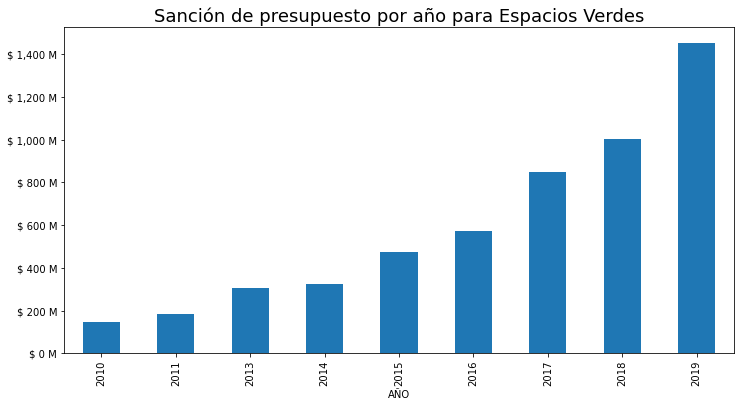

In [215]:
sancion_espacios_verdes_año = espacios_verdes.groupby('AÑO').agg({'SANCION': 'sum'})['SANCION']
g = sancion_espacios_verdes_año.plot(kind='bar', figsize=(12, 6));

ylabels = ['$ {:,.0f}'.format(x) + ' M' for x in g.get_yticks()/1000000];
g.set_yticklabels(ylabels);
plt.title("Sanción de presupuesto por año para Espacios Verdes", fontsize=18);

### Pasaremos los datos de presupuestos a valores del 2010 para ver si realmente aumentó la inversión en el área

In [216]:
# http://estudiodelamo.com/inflacion-argentina-anual-mensual-2020/

header = ["AÑO","PORC_ANUAL", "ENE","FEB","MAR","ABR","MAY","JUN","JUL","AGO","SEP","OCT","NOV","DIC"]
inflacion = pd.DataFrame(([ 2011,  23.97, 2.10, 1.50, 2.10, 1.80, 1.33, 1.56, 1.66, 1.85, 1.82, 1.52, 1.46, 1.86],
                          [ 2012,  25.98, 1.84, 1.79, 2.27, 2.19, 1.81, 1.63, 1.80, 1.93, 1.92, 1.72, 1.81, 2.04],
                          [ 2013,  23.28, 2.61, 1.14, 1.50, 1.43, 1.63, 2.19, 2.63, 2.14, 2.12, 2.11, 2.38, 3.30],
                          [ 2014,  38.53, 4.62, 4.31, 3.42, 2.59, 2.28, 2.20, 2.47, 2.65, 2.48, 2.25, 1.86, 1.87],
                          [ 2015,  27.50, 2.08, 1.48, 2.12, 2.01, 2.00, 1.53, 1.92, 2.17, 1.92, 1.52, 2.20, 3.80],
                          [ 2016,  40.30, 3.60, 4.80, 3.20, 6.70, 3.50, 2.90, 2.40, 0.50, 0.80, 2.90, 1.90, 1.60],
                          [ 2017,  24.80, 1.60, 2.10, 2.20, 2.10, 1.80, 1.30, 2.10, 1.50, 1.60, 1.50, 1.40, 3.10],
                          [ 2018,  47.65, 1.76, 2.42, 2.34, 2.74, 2.08, 3.74, 3.10, 3.89, 6.53, 5.39, 3.15, 2.57],
                          [ 2019,  53.83, 2.91, 3.77, 4.68, 3.44, 3.06, 2.72, 2.20, 3.95, 5.89, 3.29, 4.25, 3.74],
                          [ 2020,  36.62, 2.25, 2.01, 3.34, 1.50, 1.54, 2.24, 1.93, 2.70, 2.84,]), columns=header)

inflacion

,AÑO,PORC_ANUAL,ENE,FEB,MAR,ABR,MAY,JUN,JUL,AGO,SEP,OCT,NOV,DIC
0,2011,23.97,2.10,1.50,2.10,1.80,1.33,1.56,1.66,1.85,1.82,1.52,1.46,1.86
1,2012,25.98,1.84,1.79,2.27,2.19,1.81,1.63,1.80,1.93,1.92,1.72,1.81,2.04
2,2013,23.28,2.61,1.14,1.50,1.43,1.63,2.19,2.63,2.14,2.12,2.11,2.38,3.30
3,2014,38.53,4.62,4.31,3.42,2.59,2.28,2.20,2.47,2.65,2.48,2.25,1.86,1.87
4,2015,27.50,2.08,1.48,2.12,2.01,2.00,1.53,1.92,2.17,1.92,1.52,2.20,3.80
5,2016,40.30,3.60,4.80,3.20,6.70,3.50,2.90,2.40,0.50,0.80,2.90,1.90,1.60
6,2017,24.80,1.60,2.10,2.20,2.10,1.80,1.30,2.10,1.50,1.60,1.50,1.40,3.10
7,2018,47.65,1.76,2.42,2.34,2.74,2.08,3.74,3.10,3.89,6.53,5.39,3.15,2.57
8,2019,53.83,2.91,3.77,4.68,3.44,3.06,2.72,2.20,3.95,5.89,3.29,4.25,3.74
9,2020,36.62,2.25,2.01,3.34,1.50,1.54,2.24,1.93,2.70,2.84,NaN,NaN,NaN


In [217]:
inflacion_anual = inflacion.set_index('AÑO')['PORC_ANUAL'] / 100
inflacion_anual

AÑO
2011    0.2397
2012    0.2598
2013    0.2328
2014    0.3853
2015    0.2750
2016    0.4030
2017    0.2480
2018    0.4765
2019    0.5383
2020    0.3662
Name: PORC_ANUAL, dtype: float64

In [218]:
def presupuestos_a_valores_2010(sancion_espacios_verdes_año):
    presupuestos_llevados_2010 = []
    for start_year, presupuesto in sancion_espacios_verdes_año.items():
#         print('Pesos presupuestados finales del año {}:  $ {:,.0f}'.format(start_year, presupuesto))

        for tasa_inflacion in inflacion_anual.loc[start_year::-1]:

            presupuesto = presupuesto / (1+tasa_inflacion)

        presupuestos_llevados_2010.append(presupuesto)    
#         print("Pesos finales llevados a principios 2010:   $ {:,.0f}\n".format(presupuesto))

    presupuestos_llevados_2010 = pd.Series(presupuestos_llevados_2010)
    presupuestos_llevados_2010.index = sancion_espacios_verdes_año.index
    
    return presupuestos_llevados_2010

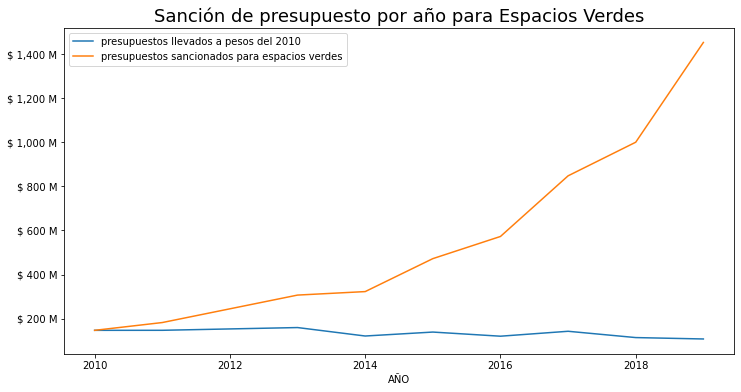

In [219]:
presupuestos_llevados_2010 = presupuestos_a_valores_2010(sancion_espacios_verdes_año)

aux = pd.concat([presupuestos_llevados_2010, sancion_espacios_verdes_año], axis=1)
aux.columns = ['presupuestos llevados a pesos del 2010', 'presupuestos sancionados para espacios verdes']
g = aux.plot(figsize=(12,6))

ylabels = ['$ {:,.0f}'.format(x) + ' M' for x in g.get_yticks()/1000000];
g.set_yticklabels(ylabels);
plt.title("Sanción de presupuesto por año para Espacios Verdes", fontsize=18);

In [220]:
presupuestos_llevados_2010 = presupuestos_llevados_2010.reset_index()
presupuestos_llevados_2010.columns = ['AÑO', 'SANCION']
presupuestos_llevados_2010['SANCION_repr'] = repr_high_values(presupuestos_llevados_2010['SANCION'])

In [221]:
presupuestos_llevados_2010 = presupuestos_llevados_2010.set_index('AÑO')
presupuestos_llevados_2010.T

AÑO,2010,2011,2013,2014,2015,2016,2017,2018,2019
SANCION,1.46668e+08,1.46842e+08,1.593e+08,1.20936e+08,1.38839e+08,1.20057e+08,1.42427e+08,1.13816e+08,1.0747e+08
SANCION_repr,$146.668.026,$146.841.583,$159.300.080,$120.936.226,$138.839.500,$120.057.368,$142.427.107,$113.816.234,$107.470.149


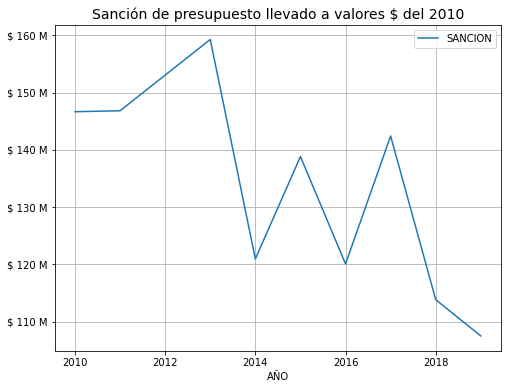

In [222]:
g = presupuestos_llevados_2010.plot(figsize=(8, 6))

ylabels = ['$ {:,.0f}'.format(x) + ' M' for x in g.get_yticks()/1000000];
g.set_yticklabels(ylabels);
plt.title("Sanción de presupuesto llevado a valores $ del 2010", fontsize=14);
plt.grid(True);

**Se puede observar que la inversión real en el área viene bajando año a año con picos en los años impares**

**Esta subida inferimos que viene asociada a años electorales**

### Sanciones por Proyecto, Actividad y Obra.

In [223]:
repr_sancion_by_subset(espacios_verdes, subset='PROYECTO')

,SANCION,SANCION_repr
PROYECTO,,
VALORIZACION DE LOS ESPACIOS VERDES,3.580603e+09,$3.580.602.639
CUIDADO Y PUESTA EN VALOR DE ESPACIOS VERDES,1.208605e+09,$1.208.605.498
OBRAS DE ESPACIOS VERDES,1.697318e+08,$169.731.781
VALORIZACION DE LOS ESPACIOS VERDES DE LA CIUDAD,1.553516e+08,$155.351.580
OBRAS DE ESPACIOS VERDES II,1.025305e+08,$102.530.490
CUIDADO Y PUESTA EN VALOR DE GRANDES PARQUES,4.580000e+07,$45.800.000
CUIDADO Y PRESERVACION DEL ARBOLADO URBANO,1.660000e+07,$16.600.001
A.CU.MAR - VALORIZACION DE LOS ESPACIOS VERDES,1.260797e+07,$12.607.967
OBRAS BA ELIGE EV,7.252834e+06,$7.252.834


In [224]:
repr_sancion_by_subset(espacios_verdes, subset='ACTIVIDAD')

,SANCION,SANCION_repr
ACTIVIDAD,,
VALORIZACION DE LOS ESPACIOS VERDES,1.982056e+09,$1.982.055.631
PRESERVACION Y PUESTA EN VALOR DE ESPEJOS DE AGUA,1.059893e+09,$1.059.893.291
ADMINISTRACION Y SERVICIOS GENERALES,5.277250e+08,$527.725.019
MANTENIMIENTO ESPACIOS VERDES LIC 248/2011,3.196141e+08,$319.614.115
TRABAJOS COMPLEMENTARIOS MANTENIMIENTO ESPACIOS VERDES,1.924693e+08,$192.469.318
VALORIZACION DE LOS ESPACIOS VERDES DE LA CIUDAD,1.476000e+08,$147.600.000
GUARDIANES DE PLAZA,1.081721e+08,$108.172.111
PARQUE ESTACION BUENOS AIRES,1.025305e+08,$102.530.490
CONDUCCION,9.753323e+07,$97.533.227


In [225]:
repr_sancion_by_subset(espacios_verdes, subset='OBRA')

,SANCION,SANCION_repr
OBRA,,
MANTENIMIENTO ESPACIOS VERDES LIC 248/2011,2.129174e+09,$2.129.174.363
TRABAJOS COMPLEMENTARIOS MANTENIMIENTO ESPACIOS VERDES,1.017843e+09,$1.017.843.351
ADMINISTRACION Y SERVICIOS GENERALES,5.277250e+08,$527.725.019
MANTENIMIENTO INTEGRAL Y LIMPIEZA DE FUENTES ORNAMENTALES,1.660569e+08,$166.056.864
CONSERVACION ESPACIOS VERDES,1.326000e+08,$132.600.000
PRESERVACION Y PUESTA EN VALOR DE ESPEJOS DE AGUA,1.109850e+08,$110.985.021
GUARDIANES DE PLAZA,1.081721e+08,$108.172.111
PARQUE ESTACION BUENOS AIRES,1.025305e+08,$102.530.490
CONDUCCION,9.753323e+07,$97.533.227


In [ ]:
# Sunburst que etiqueta los proyectos
sunburst(espacios_verdes)

### Sanción por Comuna

In [ ]:
sancion_espacios_verdes = repr_sancion_by_subset(espacios_verdes, subset=['AÑO', 'UBICACION_GEOGRAFICA']).reset_index()

In [ ]:
sancion_espacios_verdes

In [ ]:
fig = px.bar(sancion_espacios_verdes, x="AÑO", y="SANCION", color="UBICACION_GEOGRAFICA",
             title="<b>Sanción por Comuna<b>")
fig = fig.update_layout(
    title={
        'y':0.9,
        'x':0.135,
        'xanchor': 'left',
        'yanchor': 'top'})

fig = fig.update_layout(yaxis_tickformat = '$,.')

fig.show()

**Análisis del gráfico de barras:**

1. **Comuna 1:**  Sigue tendencia creciente
9. **Comuna 9:**  Sigue tendencia creciente
6. **Comuna 6:**  Sigue tendencia creciente
12. **Comuna 12:** Sigue tendencia creciente
13. **Comuna 13:** Sigue tendencia creciente
15. **Comuna 15:** Sigue tendencia creciente


2. **Comuna 2:**  Revisar datos. En 2016 hay una caida muy fuerte.
7. **Comuna 7:**  Caida en 2016
8. **Comuna 8:**  Brusca caida 2016 y 2017. Pico fuerte en 2019
10. **Comuna 10:** Brusca caida 2016 y 2017. Pico fuerte en 2019



3. **Comuna 3:**  Picos de inversión muy fuertes en 2014 y 2019
4. **Comuna 4:**  Pico de inversión muy fuerte en 2019

5. **Comuna 5:**  Mayor inversión en 2014, cae mucho en 2016.
11. **Comuna 11:** Inversión hasta 2015 y luego cae bruscamente y queda en niveles bajos.
14. **Comuna 14:** Inversión hasta 2017, cae en los últimos años



### Búsqueda de match por categoría de espacios verdes

In [ ]:
clasificaciones_espacios_verdes = ['PLAZOLETA', 'PARQUE', 'PLAZA', 'CANTERO', 'JARDIN',
                                   'PASEO', 'PATIO',
                                   'BARRIO', 'COMPLEJO', 'JARDIN BOTANICO',]

In [ ]:
a = espacios_verdes['ACTIVIDAD'].unique()
a[['PARQUE' in x for x in a]]

**plazoleta, barrio, complejo, cantero central . No se encuentran en espacios verdes pero hay referencias en otras categorías.**

In [ ]:
for clas in clasificaciones_espacios_verdes:
 
    for col in espacios_verdes.loc[:, 'PROGRAMA':'OBRA'].columns:
        
        print(col, clas, espacios_verdes[col].str.contains(clas).sum())
        print(espacios_verdes.loc[espacios_verdes[col].str.contains(clas), col].unique())

        print()

**Queda como posibilidad mergear por categoría de espacio verde. Pero en proncipio se unirá por comuna**

# Conclusión Parcial

### MERGE

In [176]:
url_evt = path_to_datasets + 'google_maps_data.csv'
google_data = pd.read_csv(url_evt)
google_data = google_data.dropna(subset=['Nombre'])
google_data = google_data.drop(['Descripcion', 'Direccion', 'CLASE'], axis=1)
google_data = google_data.rename(columns={'Nombre':'nombre'})

In [177]:
google_data.shape

(525, 3)

In [178]:
np.shape(evt)

(1736, 10)

In [179]:
def replace_tildes(series):
    series = series.str.replace("Á", "A")
    series = series.str.replace("É", "E")
    series = series.str.replace("Í", "I")
    series = series.str.replace("Ó", "O")
    series = series.str.replace("Ú", "U")
    
    return series

In [180]:
cols_str = ['nombre', 'clasificac', 'ubicacion', 'barrio']

for col in cols_str:
    evt[col] = evt[col].str.upper()
    evt[col] = replace_tildes(evt[col]) 

In [181]:
evt_score = evt.merge(google_data, left_on='nombre', right_on='nombre', how='inner')

In [182]:
evt_score = evt_score.drop(['patio_de_j', 'ubicacion', 'id_ev_pub'], axis=1)

In [183]:
evt_score = evt_score.dropna(subset=['Reviews'])

In [249]:
evt_score = evt_score.loc[evt_score['Reviews'] > 5]

In [184]:
evt_score.isna().sum()

WKT           0
nombre        0
clasificac    0
barrio        1
comuna        0
area          0
perimeter     0
Score         1
Reviews       0
dtype: int64

In [185]:
evt_score

,WKT,nombre,clasificac,barrio,comuna,area,perimeter,Score,Reviews
0,MULTIPOLYGON (((-58.4371387094279 -34.55314301...,PLAZA PQUES. NACIONALES ARGENTINOS,PLAZA,BELGRANO,13.0,12169.958,1000.000,4.3,5046.0
1,MULTIPOLYGON (((-58.4741362225437 -34.54943439...,ING. G. AVE LALLEMANT,CANTERO CENTRAL,SAAVEDRA,12.0,1948.256,100.000,4.0,114.0
3,MULTIPOLYGON (((-58.4581468288771 -34.61561559...,PLAZA IRLANDA,PLAZA,CABALLITO,6.0,32359.873,0.000,4.4,18614.0
4,MULTIPOLYGON (((-58.4085162408924 -34.57602932...,PLAZA ALEMANIA,PLAZA,PALERMO,14.0,24954.313,8000.000,4.5,2951.0
5,MULTIPOLYGON (((-58.4375850587709 -34.66379111...,IRENE BERNASCONI,CANTERO CENTRAL,VILLA SOLDATI,8.0,16770.870,0.000,3.8,10.0
7,MULTIPOLYGON (((-58.4325125306332 -34.66137741...,ATAHUALPA YUPANQUI,CANTERO CENTRAL,VILLA SOLDATI,8.0,23512.467,0.000,4.1,1160.0
9,MULTIPOLYGON (((-58.4045696562691 -34.56358012...,ING. AGR. BENITO J. CARRASCO,PARQUE,PALERMO,14.0,164879.673,0.000,5.0,1.0
10,MULTIPOLYGON (((-58.4808456354283 -34.55202186...,PARQUE BRIG. GRAL. CORNELIO SAAVEDRA,PARQUE,SAAVEDRA,12.0,99134.610,1000.000,4.5,20225.0
11,MULTIPOLYGON (((-58.519230915648 -34.620932476...,PLAZA DR. JUAN B TERAN,PLAZA,VILLA REAL,10.0,15430.768,0.000,4.4,1545.0
12,MULTIPOLYGON (((-58.3940496263873 -34.63561059...,PARQUE FLORENTINO AMEGHINO,PARQUE,PARQUE PATRICIOS,4.0,30774.662,0.000,4.3,4273.0


In [250]:
evt_score['comuna'] = evt_score['comuna'].astype('category')

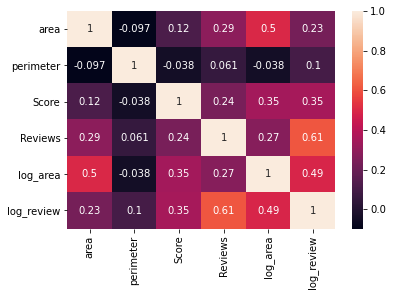

In [352]:
sns.heatmap(evt_score.corr(), annot=True)
plt.show()

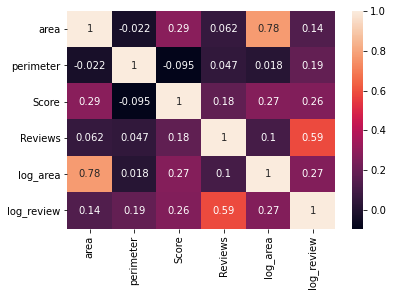

In [353]:
sns.heatmap(plaza.corr(), annot=True)
plt.show()

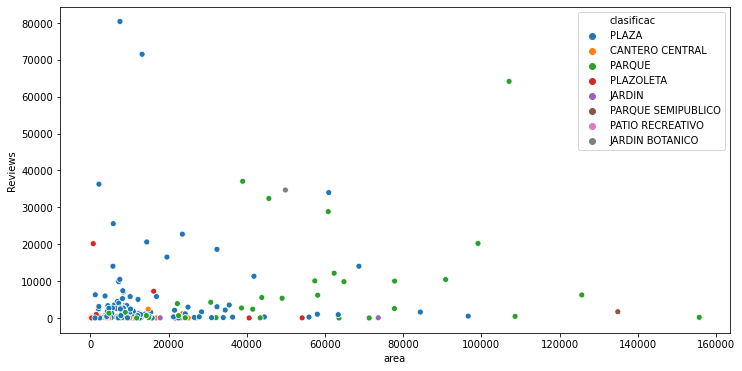

In [512]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=evt_score[evt_score['area']<200000], x='area', y='Reviews', hue='clasificac')

### Nombres de áreas verdes no coinciden con el conocimineto general del público. Por lo tanto hay sesgo en el rankeo de google maps.

In [508]:
plaza.loc[(plaza['area'] > 20000) & (plaza['Reviews'] < 10000)]

,WKT,nombre,clasificac,barrio,comuna,area,perimeter,Score,Reviews,log_area,log_review
4,MULTIPOLYGON (((-58.4085162408924 -34.57602932...,PLAZA ALEMANIA,PLAZA,PALERMO,14.0,24954.313,8000.000,4.5,2951.0,10.124842,7.990238
26,MULTIPOLYGON (((-58.3914092599896 -34.58446430...,PLAZA RUBEN DARIO,PLAZA,RECOLETA,2.0,33978.497,3000.000,4.4,116.0,10.433513,4.762174
32,MULTIPOLYGON (((-58.4205477568928 -34.56128182...,PLAZA CLUB ALEMAN DE EQUITACION - PQUE. OLIMPI...,PLAZA,PALERMO,14.0,84382.017,1462.612,4.3,1615.0,11.343121,7.387709
35,MULTIPOLYGON (((-58.3912831832971 -34.58605835...,PLAZA INT. TORCUATO DE ALVEAR,PLAZA,RECOLETA,2.0,21524.479,9000.000,4.5,2117.0,9.976993,7.658228
37,MULTIPOLYGON (((-58.3951521128112 -34.63008062...,PLAZA LA VUELTA DE OBLIGADO,PLAZA,PARQUE PATRICIOS,4.0,58044.116,0.000,4.1,1022.0,10.968976,6.930495
42,MULTIPOLYGON (((-58.4010241503753 -34.58186711...,PLAZA REPUBLICA DE CHILE,PLAZA,PALERMO,14.0,24241.275,1000.000,4.5,1128.0,10.095853,7.029088
55,MULTIPOLYGON (((-58.4623045587885 -34.69016541...,PLAZA DEMOCRACIA,PLAZA,VILLA LUGANO,8.0,34479.592,7000.000,4.3,2161.0,10.448152,7.678789
71,MULTIPOLYGON (((-58.416844269725 -34.576223981...,PLAZA INT. FRANCISCO SEEBER,PLAZA,PALERMO,14.0,35497.584,3000.000,4.4,3525.0,10.477248,8.167919
77,MULTIPOLYGON (((-58.375369313667 -34.595794821...,PLAZA SAN MARTIN,PLAZA,RETIRO,1.0,32368.014,9000.000,4.3,3056.0,10.384957,8.025189
95,MULTIPOLYGON (((-58.4217610702502 -34.56287839...,PLAZA REPUBLICA DEL ECUADOR,PLAZA,PALERMO,14.0,44481.542,1000.000,4.5,276.0,10.702852,5.624018


In [252]:
evt_score.loc[['NORTE' in x for x in evt_score['nombre']]]

,WKT,nombre,clasificac,barrio,comuna,area,perimeter,Score,Reviews,log_area,log_review


In [253]:
evt_score.groupby('clasificac').get_group('PARQUE SEMIPUBLICO')

,WKT,nombre,clasificac,barrio,comuna,area,perimeter,Score,Reviews,log_area,log_review
136,MULTIPOLYGON (((-58.4224967642447 -34.55357515...,PARQUE DE LA RAZA (AEROPARQUE),PARQUE SEMIPUBLICO,PALERMO,14.0,659422.020,0.0,4.2,5315.0,13.399121,8.578476
189,MULTIPOLYGON (((-58.3587438989034 -34.59493433...,RESERVA ECOLOGICA,PARQUE SEMIPUBLICO,PUERTO MADERO,1.0,2352162.397,0.0,4.5,61718.0,14.670846,11.030347
203,MULTIPOLYGON (((-58.4012295766176 -34.57243859...,BOSQUE ALEGRE (DEPVO. M. BELGRANO),PARQUE SEMIPUBLICO,PALERMO,14.0,134893.280,0.0,4.3,1699.0,11.812247,7.438384


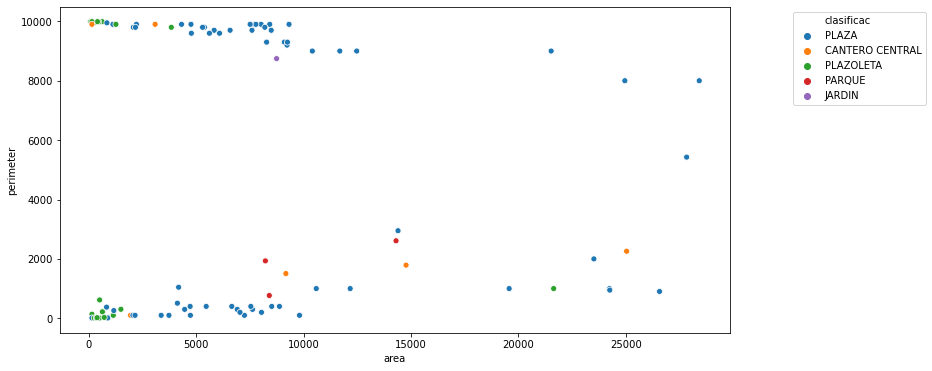

In [270]:
plt.figure(figsize=(12, 6))
aux = evt_score.loc[(evt_score['perimeter']!=0)&(evt_score['area']<30000)]
sns.scatterplot(data=aux, x='area', y='perimeter', hue='clasificac')
plt.legend(bbox_to_anchor=(1.3, 1));

**Conclusión: Los perímetros están mal cargados. No lo usaremos para el análisis**

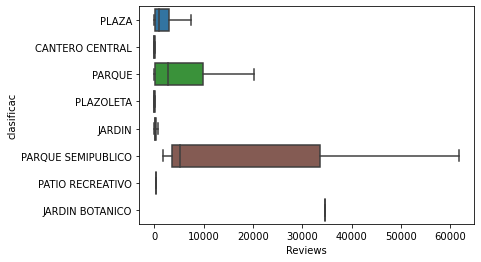

In [254]:
sns.boxplot(data=evt_score, x='Reviews', y='clasificac', showfliers=False)

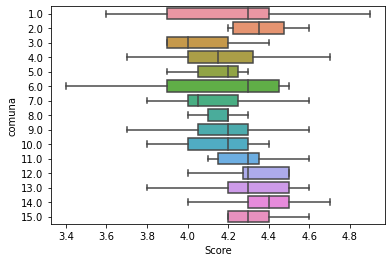

In [263]:
sns.boxplot(data=evt_score, x='Score', y='comuna', showfliers=False)

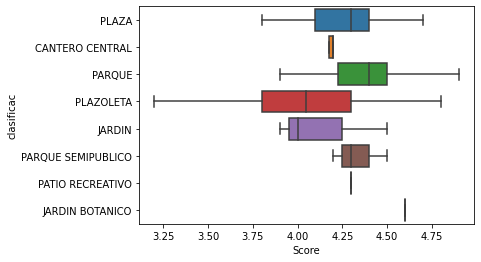

In [264]:
sns.boxplot(data=evt_score, x='Score', y='clasificac', showfliers=False)

Paso1: Agarro plazas, tomo promedios de reviews y le asigno un peso/%. Eso mismo con todas las clasificaciones.


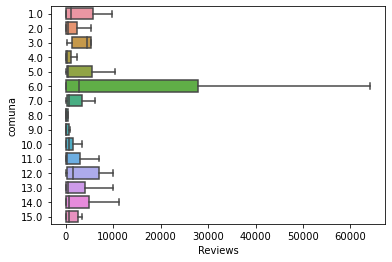

In [255]:
sns.boxplot(data=evt_score, x='Reviews', y='comuna', showfliers=False)

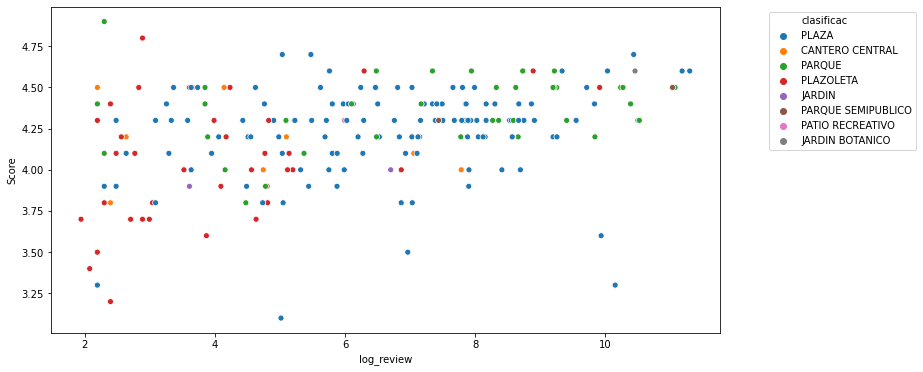

In [256]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=evt_score[evt_score['Score'] > 2.5], x='log_review', y='Score', hue='clasificac')
plt.legend(bbox_to_anchor=(1.3, 1));

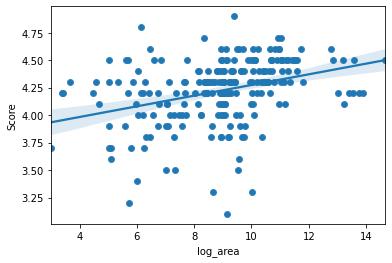

In [257]:
sns.scatterplot(data=evt_score[evt_score['Score'] > 2.5], x='log_area', y='Score')
sns.regplot(data=evt_score[evt_score['Score'] > 2.5], x='log_area', y='Score')

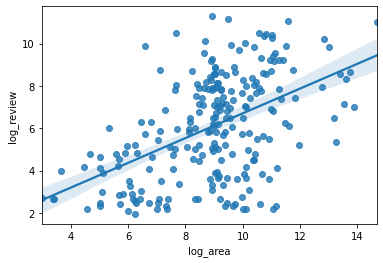

In [258]:
evt_score['log_area'] = np.log1p(evt_score['area'])
evt_score['log_review'] = np.log1p(evt_score['Reviews'])
sns.regplot(data=evt_score, x='log_area', y='log_review')

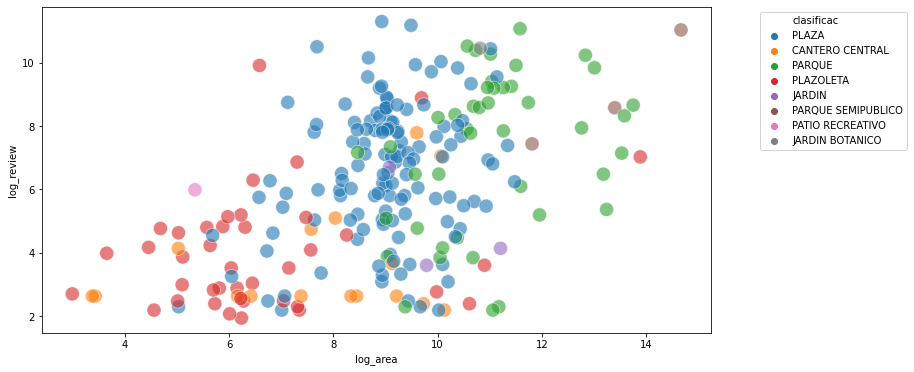

In [259]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=evt_score, x='log_area', y='log_review', hue='clasificac', s=200, alpha=0.6)
plt.legend(bbox_to_anchor=(1.3, 1));

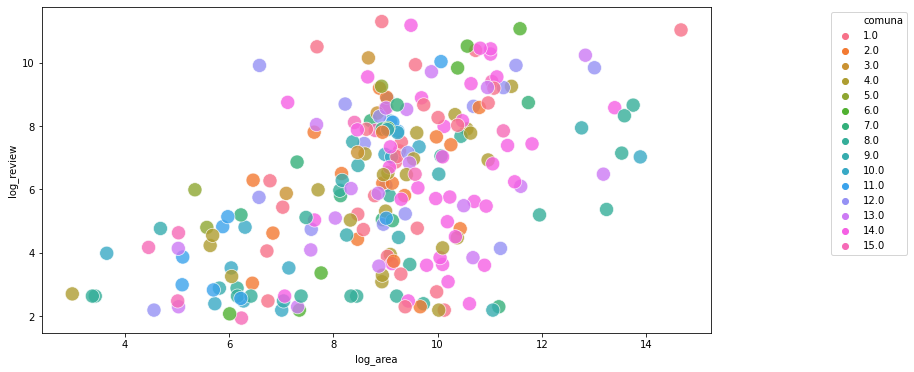

In [260]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=evt_score, x='log_area', y='log_review', hue='comuna', s=200, alpha=0.8)
plt.legend(bbox_to_anchor=(1.3, 1));

In [261]:
px.scatter(data_frame=evt_score, x='log_area', y='log_review', color='comuna', template='presentation')

In [393]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [391]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score

**Tomamos como supuesto que la cantidad de reviews está directamente relacionada con la frecuencia de visitantes que tiene cada espacio verde.**

In [338]:
plaza = evt_score.loc[evt_score['clasificac'] == 'PLAZA']

In [436]:
X = evt_score[['log_area']]
y = evt_score['log_review']

In [437]:
evt_score.shape

(235, 11)

In [449]:
np.arange(0, 0.4, 0.01)

array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39])

# Linear

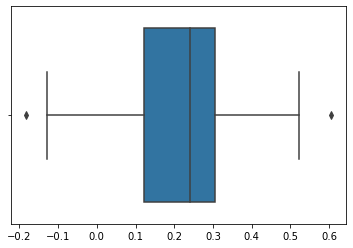

In [492]:
a = []
for i in range(100):
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=i)
    lr = LinearRegression()

    # y: Reviews
    lr.fit(x_train, y_train)
    ypred = lr.predict(x_test)
    a.append(lr.score(x_test, y_test))
sns.boxplot(a)

In [ ]:
ypred_pred = lr.predict()

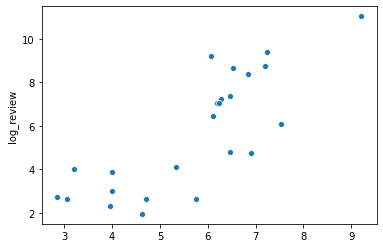

In [454]:
sns.scatterplot(ypred, y_test)

# SVR

In [461]:
from sklearn.svm import SVR

In [500]:
# Ahora cambiamos el estimador, usaremos SVR
est = SVR(max_iter=25000)
# Lista del parametro lambda (parametro 'alpha')
parameters = {'C' : [1000,1500,2000,3000,5000],
              'epsilon' : [0.001, 0.01, 0.1,1, 10,100],
             'gamma':[0.001, 0.01, 0.1,1, 10,100]}
# Definimos nuevamente el objeto GS con los parametros previamente definidos
gs = GridSearchCV(est, param_grid=parameters,refit=True,
                  cv=n_folds, scoring="r2",
                  verbose=False, n_jobs=3)

In [501]:
a = []
for i in range(100):
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=i)
    gs.fit(x_train, y_train)
    a.append(gs.best_score_)
sns.boxplot(a)

KeyboardInterrupt: 

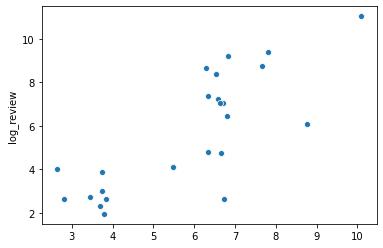

In [465]:
sns.scatterplot(ypred, y_test)

In [498]:
from sklearn.metrics import SCORERS
SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted'])

# Ridge

In [459]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=31)
gs.fit(x_train, y_train)
print(gs.best_score_, "\n")

0.1699430437713782 



In [435]:
print(gs.best_estimator_, "\n")
print(gs.best_params_, "\n")


Ridge(alpha=70) 

{'alpha': 70} 

-0.1187031493248412 



# Poly

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

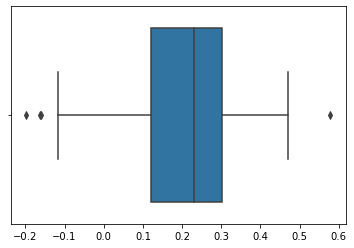

In [495]:
a = []
b = []
for i in range(100):
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=i)
    degree=3
    polyreg=make_pipeline(PolynomialFeatures(degree), LinearRegression())
    polyreg.fit(x_train, y_train)
    a.append(polyreg.score(x_test, y_test))
    
    b.append(mean_squared_error(y_test, polyreg.predict(x_test)))
sns.boxplot(a)

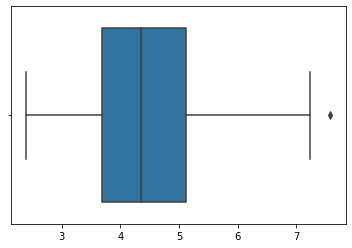

In [497]:
sns.boxplot(b)